#**Revelando la esencia del Cliente (parte I)**

##**Descripción del problema**
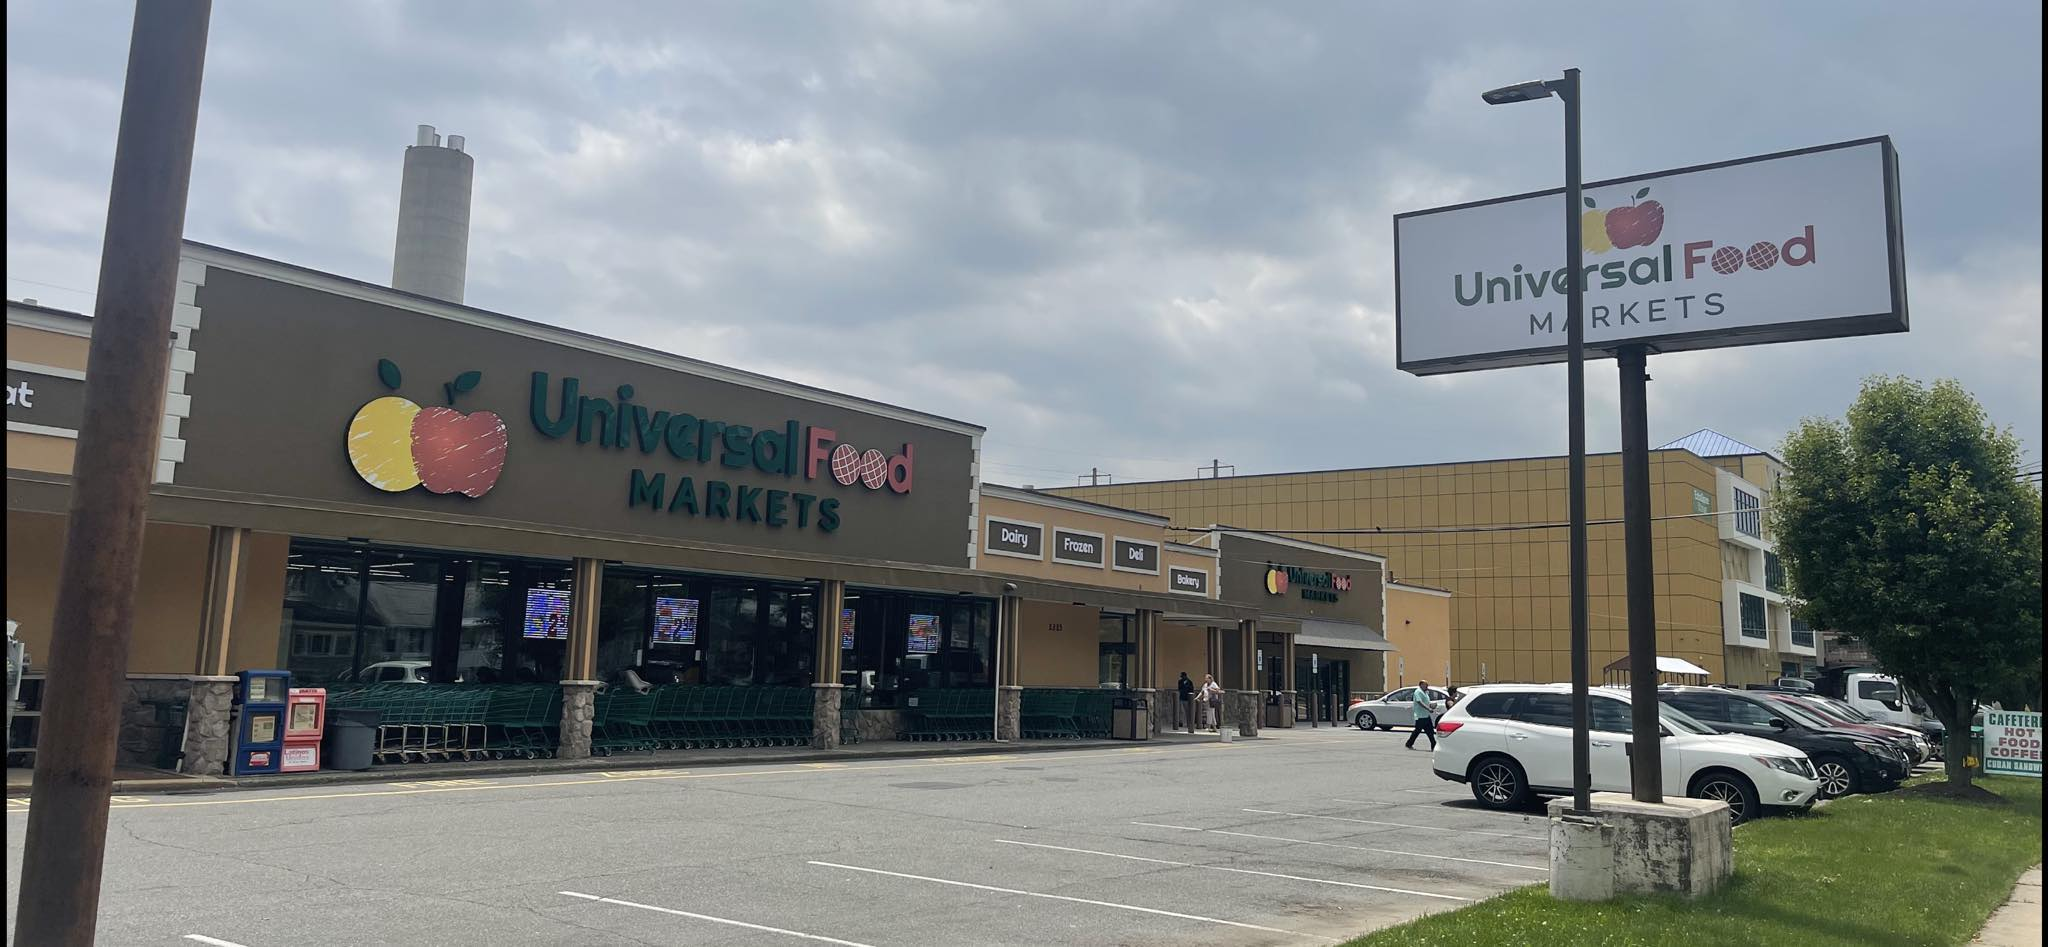

*La junta directiva de la cadena de supermercados **Universal Food** ha observado una estabilización en sus ventas y busca comprender cómo mejorar la relación con sus clientes, entendiendo sus hábitos de compra, para ofrecerles un servicio de mayor calidad. El objetivo es proporcionarles una experiencia de compra más personalizada, rápida y efectiva.*

##**1. Configuración del ambiente**

In [1]:
# @title
#Se importan las librerías necesarias, y se verifican versiones de las mismas.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings("ignore")

print(f'matplotlib --> {matplotlib.__version__}')
print(f'numpy --> {np.__version__}')
print(f'pandas --> {pd.__version__}')
print(f'seaborn --> {sns.__version__}')


matplotlib --> 3.7.1
numpy --> 1.23.5
pandas --> 1.5.3
seaborn --> 0.13.1


In [2]:
# @title
#Se vincula Colab al Google Drive donde está alojado el DataSet.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**2. Obtención de los datos**

###**2.1 Obtención del dataset original**

In [3]:
# @title
#Se obtiene el DataSet desde Google Drive.
datos = pd.read_csv('/content/drive/MyDrive/esencia_cliente/media_cost.csv')
datos.head()

food_category food_department food_family  store_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                      7.36   
1  Breakfast Foods    Frozen Foods        Food                      5.52   
2  Breakfast Foods    Frozen Foods        Food                      3.68   
3  Breakfast Foods    Frozen Foods        Food                      3.68   
4  Breakfast Foods    Frozen Foods        Food                      4.08   

   store_cost(in millions)  unit_sales(in millions)         promotion_name  \
0                   2.7232                      4.0           Bag Stuffers   
1                   2.5944                      3.0  Cash Register Lottery   
2                   1.3616                      2.0    High Roller Savings   
3                   1.1776                      2.0  Cash Register Lottery   
4                   1.4280                      3.0       Double Down Sale   

  sales_country marital_status gender  ...  grocery_sqft frozen_sqft  \
0           USA              M      F  ...       18670.0      5415.0   
1           USA              M      M  ...       18670.0      5415.0   
2           USA              S      F  ...       18670.0      5415.0   
3           USA              M      F  ...       18670.0      5415.0   
4           USA              M      M  ...       18670.0      5415.0   

  meat_sqft coffee_bar video_store  salad_bar prepared_food  florist  \
0    3610.0        1.0         1.0        1.0           1.0      1.0   
1    3610.0        1.0         1.0        1.0           1.0      1.0   
2    3610.0        1.0         1.0        1.0           1.0      1.0   
3    3610.0        1.0         1.0        1.0           1.0      1.0   
4    3610.0        1.0         1.0        1.0           1.0      1.0   

           media_type    cost  
0  Daily Paper, Radio  126.62  
1  Daily Paper, Radio   59.86  
2  Daily Paper, Radio   84.16  
3     In-Store Coupon   95.78  
4               Radio   50.79  

[5 rows x 40 columns]

In [4]:
# @title
#Observamos la información general del dataset
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

###**2.2 Columnas y Descripción**

**food_category**: tipo de comida

**food_department**: departamento al que pertenece el tipo de comida

**food_family**: familia de alimentos al que pertenece

**store_sales(in millions)**: ventas de la tienda (en millones de dólares)  

**store_cost(in millions)**: costo de la tienda (en millones de dólares)  

**unit_sales(in millions)**: unidades vendidas (en millones)     
    
**promotion_name**: nombre de la promoción                

**sales_country**: país donde ocurre la venta                  
   
**marital_status**: estado civil
               
**gender**: género

**total_children**: total de hijos

**education**: escolaridad

**member_card**: tarjeta de miembro

**occupation**: ocupación

**houseowner**: vivienda propia

**avg_cars_at home(approx)**: promedio de autos(aprox)

**avg. yearly_income**: ingreso anual

**num_children_at_home**: número de hijos

**avg_cars_at home(approx)**: promedio de autos (aprox)

**brand_name**: marca

**SRP**: precio recomendado

**gross_weight**: peso bruto

**net_weight**: peso neto

**recyclable_package**: envase reciclable

**low_fat**: bajo en grasa

**units_per_case**: unidades por caja  

**store_type**: tipo de comercio  

**store_city**: ciudad

**store_state**: estado

**store_sqft**: superficie total de la tienda ( en pies cuadrados)

**grocery_sqft**: superficie de sector comestibles (en pies cuadrados)  

**frozen_sqft**: superficie de sector congelados ( en pies cuadrados)

**meat_sqft**: superficie de sector carnes (en pies cuadrados)

**coffee_bar**: cafetería

**video_store**: tienda de videos

**salad_bar**: barra de ensaladas  

**prepared_food**: comida preparada

**florist**: florería

**media_type**: tipo de divulgación

**cost**: costo adquisisión de clientes (en dólares)               

###**2.3 Traducción del dataset original**

In [5]:
# @title
#Se procede a la traducción del DataSet al español.
columnas = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)',
    'unit_sales(in millions)': 'ventas_unitarias(en millones)',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'miembro',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
    'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox)',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}

categoria_alimento = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}

departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Frozen Foods': 'Alimentos congelados',
    'Baking Goods': 'Productos para hornear',
    'Canned Foods': 'Alimentos enlatados',
    'Dairy': 'Productos lácteos',
    'Health and Hygiene': 'Salud e higiene',
    'Beverages': 'Bebidas',
    'Deli': 'Charcutería',
    'Baked Goods': 'Productos horneados',
    'Alcoholic Beverages': 'Bebidas alcohólicas',
    'Snacks': 'Snacks',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Periodicals': 'Publicaciones periódicas',
    'Eggs': 'Huevos',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Canned Products': 'Productos enlatados',
    'Checkout': 'Caja de salida',
    'Meat': 'Carne',
    'Seafood': 'Mariscos',
    'Carousel': 'Carrusel'
}

tipo= {'Food':'Comida', 'Non-Consumable':'No comestible', 'Drink':'Bebida'}

promocion = {
    'Weekend Markdown': 'Descuento de fin de semana',
    'Two Day Sale': 'Venta de dos días',
    'Price Savers': 'Ahorro de precios',
    'Price Winners': 'Ganadores de precios',
    'Save-It Sale': 'Venta Ahorra Ya',
    'Super Duper Savers': 'Super Ahorradores',
    'Super Savers': 'Super Ahorro',
    'One Day Sale': 'Venta de un día',
    'Double Down Sale': 'Venta Doble',
    'High Roller Savings': 'Ahorro para apostadores grandes',
    'Green Light Days': 'Días de luz verde',
    'Shelf Clearing Days': 'Días de liquidación de estanterías',
    'Price Slashers': 'Rebajadores de precios',
    'Free For All': 'Gratis para todos',
    'Cash Register Lottery': 'Lotería de la caja registradora',
    'Go For It': 'Adelante',
    'Two for One': 'Dos por uno',
    'Money Savers': 'Ahorradores de dinero',
    'Big Time Discounts': 'Descuentos de gran magnitud',
    'Price Destroyers': 'Destructores de precios',
    'Saving Days': 'Días de ahorro',
    'Dollar Cutters': 'Recortadores de dólares',
    'Unbeatable Price Savers': 'Ahorro de precios imbatible',
    'Sales Galore': 'Promociones por montones',
    'Big Promo': 'Gran promoción',
    'Dimes Off': 'Más barato',
    'Sales Days': 'Días de venta',
    'Price Cutters': 'Rebajando precios',
    'You Save Days': 'Días de ahorro',
    'Savings Galore': 'Ahorros por montones',
    'Bag Stuffers': 'Bolsas llenas',
    'Three for One': 'Tres por uno',
    'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
    'Sale Winners': 'Ganadores de ventas',
    'Pick Your Savings': 'Elige tus ahorros',
    'Bye Bye Baby': 'Adiós bebé',
    'Best Savings': 'Mejores ahorros',
    'Tip Top Savings': 'Ahorro de primera clase',
    'Shelf Emptiers': 'Estantes vacíos',
    'Big Time Savings': 'Ahorro Enorme',
    'Wallet Savers': 'Ahorradores de billetera',
    'Dollar Days': 'Días de dólar',
    'Mystery Sale': 'Venta misteriosa',
    'Price Smashers': 'Aplastadores de precios',
    'Green Light Special': 'Especial luz verde',
    'Coupon Spectacular': 'Espectacular de cupones',
    'Super Wallet Savers': 'Super ahorradores de billetera',
    'Double Your Savings': 'Duplica tus ahorros',
    'Fantastic Discounts': 'Descuentos fantásticos'
}

escolaridad = {
    'Partial High School':'Primaria',
    'High School Degree':'Secundaria',
    'Bachelors Degree':'Superior',
    'Partial College':'Técnico',
    'Graduate Degree':'Maestría'
}

miembro = {
    'Bronze':'Bronce',
    'Golden': 'Oro',
    'Silver':'Plata'
}

ocupacion = {
    'Professional':'Profesional',
    'Skilled Manual':'Técnico',
    'Manual':'Obrero',
    'Management':'Gestión',
    'Clerical':'Cargo de Oficina'
}

pais = {
    'USA':'Estados Unidos',
    'Mexico':'México',
    'Canada':'Canadá'
}

estado_civil = {
    'S':'Soltero', 'M':'Casado'
}

genero ={
    'F':'Femenino',
    'M':'Masculino'
}

vivienda_propia={'Y':'Sí', 'N':'No'}

ingreso_anual={
    '$30K - $50K':40000,
    '$10K - $30K':20000,
    '$50K - $70K':60000,
    '$70K - $90K':80000,
    '$130K - $150K':140000,
    '$90K - $110K':100000,
    '$110K - $130K':120000,
    '$150K +':160000
}



comercio = {
    'Supermarket': 'Supermercado',
    'Deluxe Supermarket': 'Supermercado de lujo',
    'Gourmet Supermarket': 'Supermercado gourmet',
    'Mid-Size Grocery': 'Supermercado mediano',
    'Small Grocery': 'Pequeño supermercado'
}


divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'
}

datos_modificado = datos.rename(columns=columnas)
datos_modificado.categoria_alimento = datos_modificado.categoria_alimento.map(categoria_alimento)
datos_modificado.departamento = datos_modificado.departamento.map(departamento)
datos_modificado.tipo = datos_modificado.tipo.map(tipo)
datos_modificado.promocion = datos_modificado.promocion.map(promocion)
datos_modificado.escolaridad = datos_modificado.escolaridad.map(escolaridad)
datos_modificado.miembro = datos_modificado.miembro.map(miembro)
datos_modificado.ocupacion = datos_modificado.ocupacion.map(ocupacion)
datos_modificado.pais = datos_modificado.pais.map(pais)
datos_modificado.estado_civil = datos_modificado.estado_civil.map(estado_civil)
datos_modificado.genero = datos_modificado.genero.map(genero)
datos_modificado.vivienda_propia = datos_modificado.vivienda_propia.map(vivienda_propia)
datos_modificado.ingreso_anual = datos_modificado.ingreso_anual.map(ingreso_anual)
datos_modificado.comercio = datos_modificado.comercio.map(comercio)
datos_modificado.divulgacion = datos_modificado.divulgacion.map(divulgacion)
datos_modificado.head(10)

categoria_alimento          departamento    tipo  \
0  Alimentos para el desayuno  Alimentos congelados  Comida   
1  Alimentos para el desayuno  Alimentos congelados  Comida   
2  Alimentos para el desayuno  Alimentos congelados  Comida   
3  Alimentos para el desayuno  Alimentos congelados  Comida   
4  Alimentos para el desayuno  Alimentos congelados  Comida   
5  Alimentos para el desayuno  Alimentos congelados  Comida   
6  Alimentos para el desayuno  Alimentos congelados  Comida   
7  Alimentos para el desayuno  Alimentos congelados  Comida   
8  Alimentos para el desayuno  Alimentos congelados  Comida   
9  Alimentos para el desayuno  Alimentos congelados  Comida   

   ventas_tienda(en millones)  costo_tienda(en millones)  \
0                        7.36                     2.7232   
1                        5.52                     2.5944   
2                        3.68                     1.3616   
3                        3.68                     1.1776   
4                        4.08                     1.4280   
5                        4.08                     1.4688   
6                        5.44                     2.5568   
7                        3.74                     1.6082   
8                        4.08                     1.4688   
9                        9.72                     4.5684   

   ventas_unitarias(en millones)                        promocion  \
0                            4.0                    Bolsas llenas   
1                            3.0  Lotería de la caja registradora   
2                            2.0  Ahorro para apostadores grandes   
3                            2.0  Lotería de la caja registradora   
4                            3.0                      Venta Doble   
5                            3.0                      Venta Doble   
6                            4.0  Lotería de la caja registradora   
7                            2.0  Lotería de la caja registradora   
8                            3.0  Lotería de la caja registradora   
9                            3.0  Ahorro para apostadores grandes   

             pais estado_civil     genero  ...  pies_cuadrados_comestibles  \
0  Estados Unidos       Casado   Femenino  ...                     18670.0   
1  Estados Unidos       Casado  Masculino  ...                     18670.0   
2  Estados Unidos      Soltero   Femenino  ...                     18670.0   
3  Estados Unidos       Casado   Femenino  ...                     18670.0   
4  Estados Unidos       Casado  Masculino  ...                     18670.0   
5  Estados Unidos       Casado   Femenino  ...                     18670.0   
6  Estados Unidos      Soltero   Femenino  ...                     18670.0   
7  Estados Unidos      Soltero  Masculino  ...                     18670.0   
8  Estados Unidos      Soltero   Femenino  ...                     18670.0   
9  Estados Unidos      Soltero   Femenino  ...                     18670.0   

  pies_cuadrados_congelados pies_cuadrados_carne cafeteria tienda_de_videos  \
0                    5415.0               3610.0       1.0              1.0   
1                    5415.0               3610.0       1.0              1.0   
2                    5415.0               3610.0       1.0              1.0   
3                    5415.0               3610.0       1.0              1.0   
4                    5415.0               3610.0       1.0              1.0   
5                    5415.0               3610.0       1.0              1.0   
6                    5415.0               3610.0       1.0              1.0   
7                    5415.0               3610.0       1.0              1.0   
8                    5415.0               3610.0       1.0              1.0   
9                    5415.0               3610.0       1.0              1.0   

   barra_de_ensaladas  comida_preparada  floristeria              divulgacion  \
0                 1.0               1.0          1.0  Periódico diario, radio   
1    

##**3. Exploración de los datos**

In [6]:
# @title
#Seteamos las opciones para poder visualizar todas las columnas
pd.set_option("display.max_columns", None)
datos_modificado.head(5)


categoria_alimento          departamento    tipo  \
0  Alimentos para el desayuno  Alimentos congelados  Comida   
1  Alimentos para el desayuno  Alimentos congelados  Comida   
2  Alimentos para el desayuno  Alimentos congelados  Comida   
3  Alimentos para el desayuno  Alimentos congelados  Comida   
4  Alimentos para el desayuno  Alimentos congelados  Comida   

   ventas_tienda(en millones)  costo_tienda(en millones)  \
0                        7.36                     2.7232   
1                        5.52                     2.5944   
2                        3.68                     1.3616   
3                        3.68                     1.1776   
4                        4.08                     1.4280   

   ventas_unitarias(en millones)                        promocion  \
0                            4.0                    Bolsas llenas   
1                            3.0  Lotería de la caja registradora   
2                            2.0  Ahorro para apostadores grandes   
3                            2.0  Lotería de la caja registradora   
4                            3.0                      Venta Doble   

             pais estado_civil     genero  total_de_hijos escolaridad miembro  \
0  Estados Unidos       Casado   Femenino             1.0    Primaria     NaN   
1  Estados Unidos       Casado  Masculino             0.0    Superior   Plata   
2  Estados Unidos      Soltero   Femenino             4.0    Primaria     NaN   
3  Estados Unidos       Casado   Femenino             2.0  Secundaria  Bronce   
4  Estados Unidos       Casado  Masculino             0.0    Primaria  Bronce   

     ocupacion vivienda_propia  promedio_autos(aprox)  ingreso_anual  \
0      Técnico              Sí                    1.0          20000   
1  Profesional              Sí                    4.0          60000   
2       Obrero              No                    1.0          20000   
3       Obrero              Sí                    2.0          40000   
4      Técnico              No                    2.0          40000   

   numero_hijos  promedio_autos(aprox)       marca  precio_recomendado  \
0           1.0                    1.0  Carrington                1.84   
1           0.0                    4.0  Carrington                1.84   
2           0.0                    1.0  Carrington                1.84   
3           2.0                    2.0  Carrington                1.84   
4           0.0                    2.0      Golden                1.36   

   peso_bruto  peso_neto  empaque_reciclable  bajo_en_grasa  \
0       19.70      17.70                 1.0            0.0   
1       19.70      17.70                 1.0            0.0   
2       19.70      17.70                 1.0            0.0   
3       19.70      17.70                 1.0            0.0   
4        7.12       5.11                 0.0            1.0   

   unidades_por_caja              comercio ciudad estado  \
0               17.0  Supermercado de lujo  Salem     OR   
1               17.0  Supermercado de lujo  Salem     OR   
2               17.0  Supermercado de lujo  Salem     OR   
3               17.0  Supermercado de lujo  Salem     OR   
4               29.0  Supermercado de lujo  Salem     OR   

   pies_cuadrados_tienda  pies_cuadrados_comestibles  \
0                27694.0                     18670.0   
1                27694.0                     18670.0   
2                27694.0                     18670.0   
3                27694.0                     18670.0   
4                27694.0                     18670.0   

   pies_cuadrados_congelados  pies_cuadrados_carne  cafeteria  \
0                     5415.0                3610.0        1.0   
1                     5415.0                3610.0        1.0   
2                     5415.0                3610.0        1.0   
3                     5415.0                3610.0        1.0   
4                     5415.0                3610.0        1.0   

   tienda_de_videos  ba

In [7]:
# @title
#Modificamos los campos donde el cliente no posea tarjeta de miembro(Oro, Plata o Bronce) indicando con "No"
datos_modificado.miembro.fillna("No", inplace = True)
datos_modificado.head(5)


categoria_alimento          departamento    tipo  \
0  Alimentos para el desayuno  Alimentos congelados  Comida   
1  Alimentos para el desayuno  Alimentos congelados  Comida   
2  Alimentos para el desayuno  Alimentos congelados  Comida   
3  Alimentos para el desayuno  Alimentos congelados  Comida   
4  Alimentos para el desayuno  Alimentos congelados  Comida   

   ventas_tienda(en millones)  costo_tienda(en millones)  \
0                        7.36                     2.7232   
1                        5.52                     2.5944   
2                        3.68                     1.3616   
3                        3.68                     1.1776   
4                        4.08                     1.4280   

   ventas_unitarias(en millones)                        promocion  \
0                            4.0                    Bolsas llenas   
1                            3.0  Lotería de la caja registradora   
2                            2.0  Ahorro para apostadores grandes   
3                            2.0  Lotería de la caja registradora   
4                            3.0                      Venta Doble   

             pais estado_civil     genero  total_de_hijos escolaridad miembro  \
0  Estados Unidos       Casado   Femenino             1.0    Primaria      No   
1  Estados Unidos       Casado  Masculino             0.0    Superior   Plata   
2  Estados Unidos      Soltero   Femenino             4.0    Primaria      No   
3  Estados Unidos       Casado   Femenino             2.0  Secundaria  Bronce   
4  Estados Unidos       Casado  Masculino             0.0    Primaria  Bronce   

     ocupacion vivienda_propia  promedio_autos(aprox)  ingreso_anual  \
0      Técnico              Sí                    1.0          20000   
1  Profesional              Sí                    4.0          60000   
2       Obrero              No                    1.0          20000   
3       Obrero              Sí                    2.0          40000   
4      Técnico              No                    2.0          40000   

   numero_hijos  promedio_autos(aprox)       marca  precio_recomendado  \
0           1.0                    1.0  Carrington                1.84   
1           0.0                    4.0  Carrington                1.84   
2           0.0                    1.0  Carrington                1.84   
3           2.0                    2.0  Carrington                1.84   
4           0.0                    2.0      Golden                1.36   

   peso_bruto  peso_neto  empaque_reciclable  bajo_en_grasa  \
0       19.70      17.70                 1.0            0.0   
1       19.70      17.70                 1.0            0.0   
2       19.70      17.70                 1.0            0.0   
3       19.70      17.70                 1.0            0.0   
4        7.12       5.11                 0.0            1.0   

   unidades_por_caja              comercio ciudad estado  \
0               17.0  Supermercado de lujo  Salem     OR   
1               17.0  Supermercado de lujo  Salem     OR   
2               17.0  Supermercado de lujo  Salem     OR   
3               17.0  Supermercado de lujo  Salem     OR   
4               29.0  Supermercado de lujo  Salem     OR   

   pies_cuadrados_tienda  pies_cuadrados_comestibles  \
0                27694.0                     18670.0   
1                27694.0                     18670.0   
2                27694.0                     18670.0   
3                27694.0                     18670.0   
4                27694.0                     18670.0   

   pies_cuadrados_congelados  pies_cuadrados_carne  cafeteria  \
0                     5415.0                3610.0        1.0   
1                     5415.0                3610.0        1.0   
2                     5415.0                3610.0        1.0   
3                     5415.0                3610.0        1.0   
4                     5415.0                3610.0        1.0   

   tienda_de_videos  ba

### ***Mapa de Correlación***

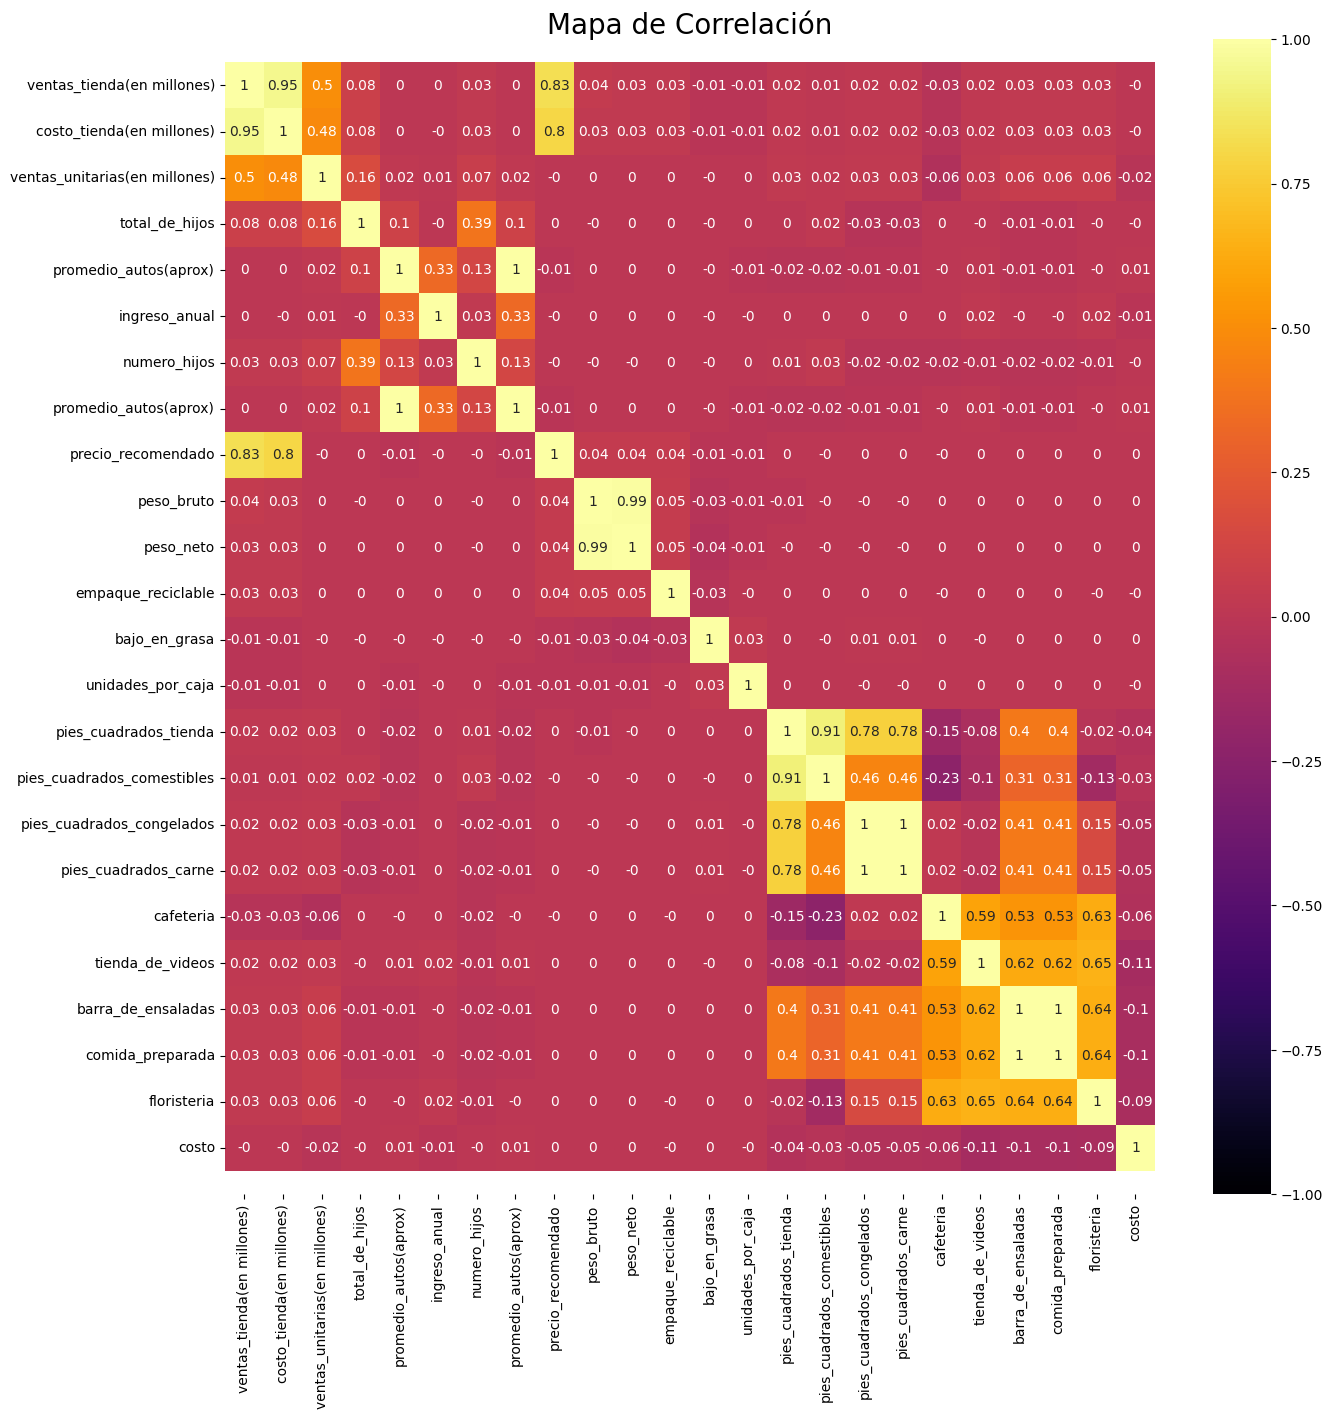

In [8]:
# @title
#Obtenemos el Mapa de Correlación para observar el comportamiento de las variables
datos_correlacion = datos_modificado.corr()
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(datos_correlacion.round(2), vmin=-1, vmax=1, annot=True, cmap = "inferno")
heatmap.set_title('Mapa de Correlación', fontsize = 20, pad=1)


bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

<font color=black size=4> Interpretación Mapa de Correlación: </font>

---
**Valor r	Fuerza de la correlación**

0.0 < 0.1	no hay correlación

0.1 < 0.3	poca correlación

0.3 < 0.5	correlación media

0.5 < 0.7	correlación alta

0.7 < 1	correlación muy alta

A partir de la clasificación precedente y enfocándonos en los valores de correlación mayores a 0.7 (correlación muy alta), se puede inferir mediante la observación del Mapa de Correlación que:

-las variables ventas_tienda y costo_tienda tienen una muy alta correlación, por los que nos quedaremos sólo con ventas_tienda por sernos más útil para este caso.

-las variables ventas_tienda y precio_recomendado tienen una alta correlación. Nos quedaremos con ventas_tienda por sernos más útil en este estudio.

-las variables peso_bruto y peso_neto tienen alta correlación. Mantendremos en el estudio la variable peso_neto.

-las variables pies_cuadrados_comestibles, pies_cuadrados_congelados y pies_cuadrados_carne tienen una alta correlación con pies_cuadrados_tienda. Mantendremos sólo esta última variable.

-las variables barra_de_ensaladas y comida_preparada tienen alta correlación. Mantendremos esta última variable para continuar el estudio.


In [9]:
# @title
def plot_porcentajes(columna, datos):
  #plt.figure(figsize=(20,8))

  grafico = sns.countplot(x=columna, data=datos, orient='h')
  grafico.set_ylabel('Número de ocurrencias', fontsize=14)

  sizes = []

  for p in grafico.patches:
    height = p.get_height()
    sizes.append(height)
    grafico.text(p.get_x() + p.get_width()/2, height, f'{round(height/len(datos)*100,2)}%', ha='center', va='bottom', fontsize=10)

  grafico.set_ylim(0, max(sizes)*1.1)


### ***Distribución de Clientes según Membresía***

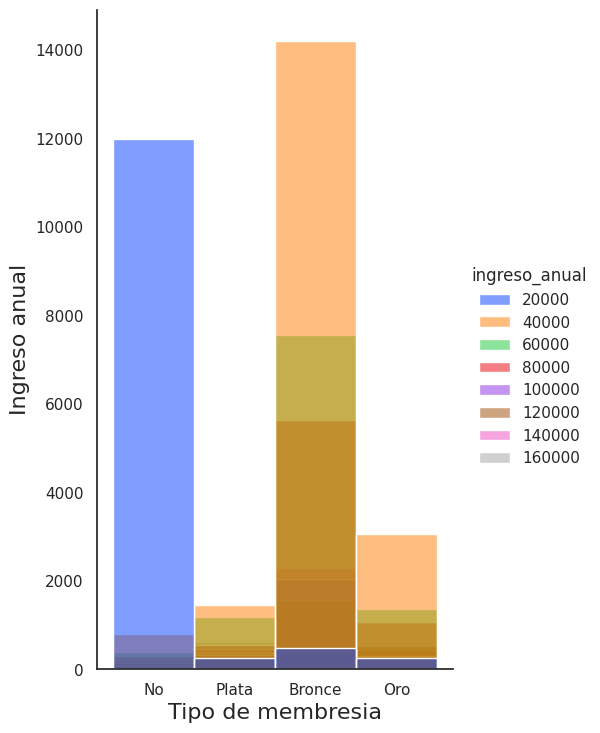

In [116]:
#@title
ax = sns.displot(data = datos_modificado, x = "miembro", hue = "ingreso_anual", palette = "bright")
ax.figure.set_size_inches(6,8)
ax.set_ylabels("Ingreso anual", fontsize = 16)
ax.set_xlabels("Tipo de membresia", fontsize = 16)
ax = ax

<font color=black size=4> Observaciones e hipótesis: </font>

---

De la observación del gráfico, podemos observar que la mayoría de los clientes están en la Membresía Bronce. Un dato llamativo es la gran cantidad de clientes que no poseen membresía.

### ***Distribución de Clientes según País***

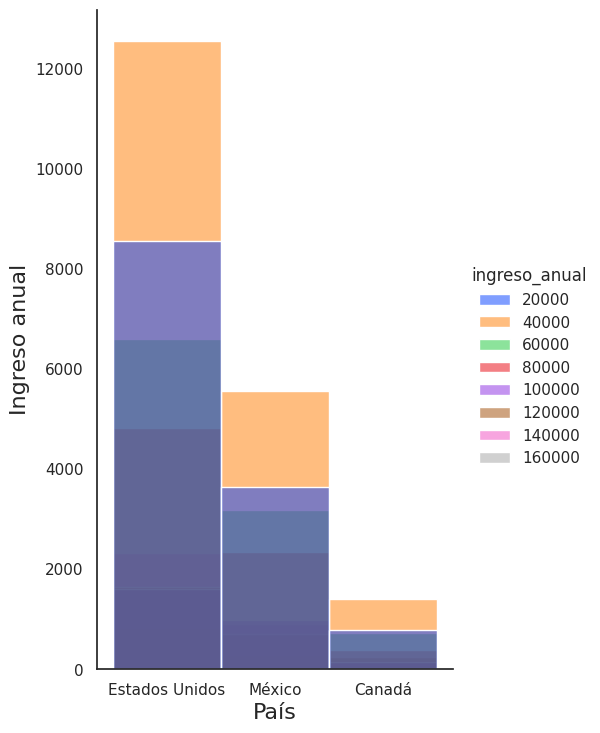

In [117]:
#@title
ax = sns.displot(data = datos_modificado, x = "pais", hue = "ingreso_anual", palette = "bright")
ax.figure.set_size_inches(6,8)
ax.set_ylabels("Ingreso anual", fontsize = 16)
ax.set_xlabels("País", fontsize = 16)
ax = ax

<font color=black size=4> Observaciones e hipótesis: </font>

---

De la observación del gráfico, podemos observar que la mayoría de los clientes provienen de USA, y en mucha menor medida de México y Canadá.

### ***Distribución de Clientes según Género y Estado Civil***

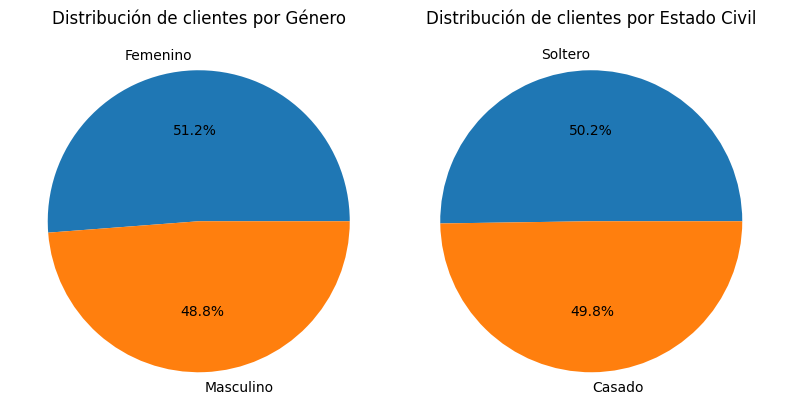

In [10]:
# @title
# Gráficos de torta más pequeños con figsize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

# Género
genero = datos_modificado.genero.value_counts().values
ax1.pie(genero, labels=datos_modificado.genero.value_counts().index, autopct='%1.1f%%')
ax1.set_title("Distribución de clientes por Género")

# Estado Civil
estado_civil = datos_modificado.estado_civil.value_counts().values
ax2.pie(estado_civil, labels=datos_modificado.estado_civil.value_counts().index, autopct='%1.1f%%')
ax2.set_title("Distribución de clientes por Estado Civil")

plt.tight_layout()
plt.show()


<font color=black size=4> Observaciones e hipótesis: </font>

---

De la observación de los gráficos de torta, se puede inferir que tanto hombres como mujeres compran casi en la misma proporción. Lo mismo ocurre con las persona solteras y casadas.
Esto podría (hipotéticamente) indicar que las compras en esta cadena de tiendas es independiente del género y estado civil.

### ***Distribución de Clientes según Calorías y Empaque***

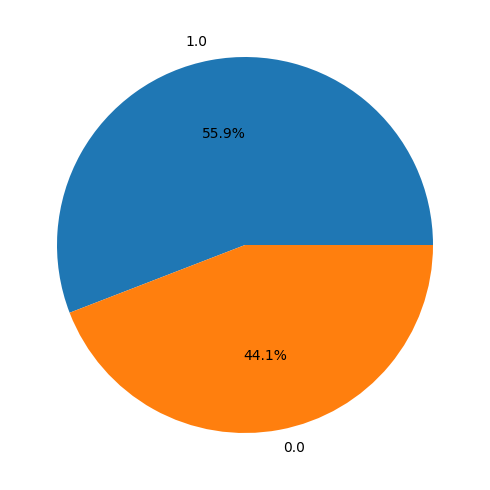

In [11]:
# @title
# Gráficos de torta
plt.figure (figsize=(8, 5))


empaque = datos_modificado.empaque_reciclable.value_counts().values
plt.pie(empaque, labels=datos_modificado.empaque_reciclable.value_counts().index, autopct='%1.1f%%')
ax1.set_title("Distribución de alimentos por Tipo de Empaque")


plt.tight_layout()
plt.show()

<font color=black size=4> Observaciones e hipótesis: </font>

---

Al observar la distribución de clientes según su elección al momento de adquirir artículos, podemos observar que la mayoría se inclina por artículos con empaque reciclable (56%). A partir de esta información podríamos, hipotéticamente, decir que los clientes se preocupan por el cuidado del ambiente.

### ***Distribución de Clientes según Escolaridad***

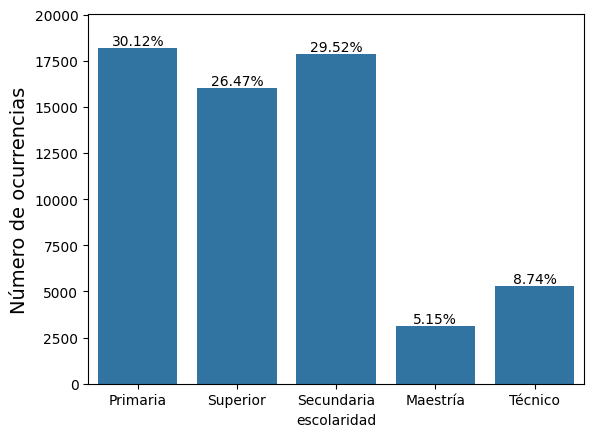

In [12]:
# @title
plot_porcentajes(datos_modificado.escolaridad, datos_modificado)


<font color=black size=4> Observaciones e hipótesis: </font>

---

Al observar la distribución de clientes según su Escolaridad, observamos que individualmente personas con primaria y secundaria son las que más compran (> 60%).
Por otro lado podemos analizar que casi el 70% de los clientes tienen estudios secundarios o superiores, lo que nos permitiría inferir que los clientes de esta cadena, son personas con un nivel de instrucción alto.


### ***Distribución de Clientes según Ocupación***

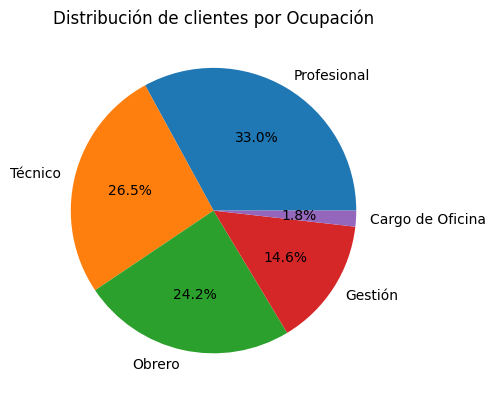

In [13]:
# @title
plt.figure(figsize=(5, 5))
ocupacion = datos_modificado.ocupacion.value_counts().values
plt.pie(ocupacion, labels=datos_modificado.ocupacion.value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de clientes por Ocupación")
plt.tight_layout()
plt.show()


<font color=black size=4> Observaciones e hipótesis: </font>

---

En lo referente a Ocupación, vemos que poco más del 75% de los clientes poseen un trabajo calificado, reafirmando lo que se observó con respecto a escolaridad. Los clientes son personas instruídas y con trabajos de alta calificación.

### ***Distribución de Clientes según Miembro***

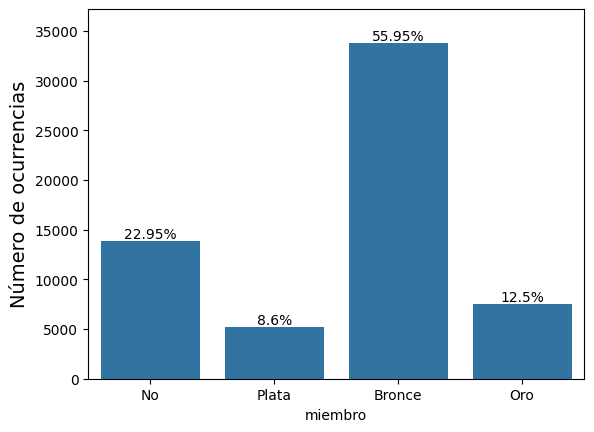

In [14]:
#@title
plot_porcentajes(datos_modificado.miembro, datos_modificado)


<font color=black size=4> Observaciones e hipótesis: </font>

---

Los clientes mayoritariamente son clientes Bronce, a partir de los cual podríamos inferir que son personas que compran esporádicamente o con valores monetarios más bajos.

### ***Distribución de Clientes según Número de Hijos***

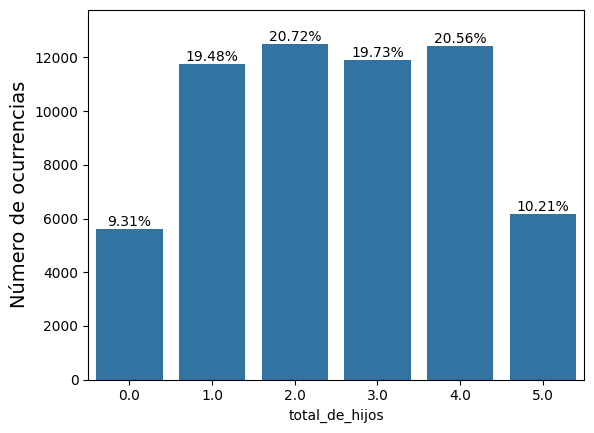

In [15]:
#@title
plot_porcentajes(datos_modificado.total_de_hijos, datos_modificado)

### ***Distribución de Clientes según Número de Hijos (declarado por los clientes)***

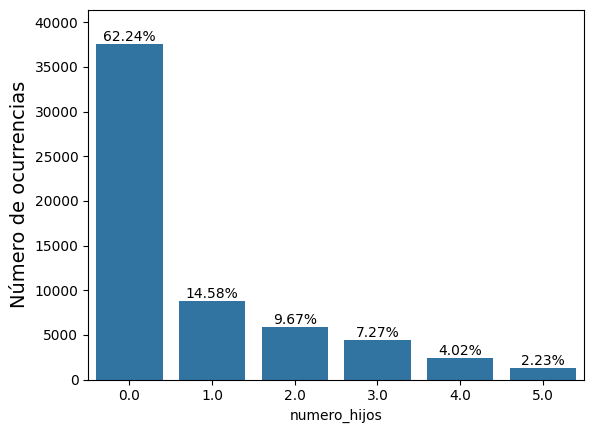

In [16]:
#@title
plot_porcentajes(datos_modificado.numero_hijos, datos_modificado)

<font color=black size=4> Observaciones e hipótesis: </font>

---

Al observar lo referente al número de hijos, nos encontramos que varía enormemente la distribución según analicemos lo referido por el cliente al momento de declarar en la tienda ,y el número real de hijos.
Usaremos los datos declarados por el cliente, ya que es la información que maneja la cadena de supermercados.

### ***Distribución de Clientes según Ingreso Anual***

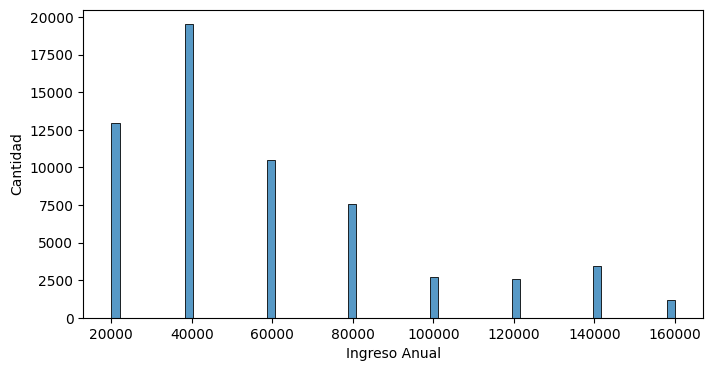

In [17]:
#@title
plt.figure(figsize=(8, 4))
sns.histplot(x=datos_modificado.ingreso_anual)
plt.xlabel('Ingreso Anual')
plt.ylabel('Cantidad')
plt.show()

<font color=black size=4> Observaciones e hipótesis: </font>

---

Al analizar la distribución de clientes según Ingreso Anual, podemos observar que predominan los clientes de ingresos más bajos. Más del 70% de los clientes se ubican en las tres categorías más bajas en cuanto a ingresos anuales, lo que podría estar mostrándonos que son personas que no disponen de mucho dinero para comprar en cantidad y se enfocarían en adquirir lo básico (comida).

### ***Distribución de Alimentos según Tipo***

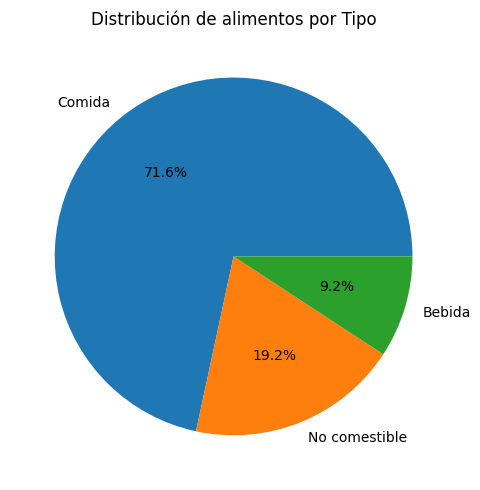

In [18]:
#@title
plt.figure(figsize=(5, 5))
tipo_alimento = datos_modificado.tipo.value_counts().values
plt.pie(tipo_alimento, labels=datos_modificado.tipo.value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de alimentos por Tipo")
plt.tight_layout()
plt.show()


<font color=black size=4> Observaciones e hipótesis: </font>

---

Reafirmando la hipótesis anterior, podemos observar que más del 70% de los clientes adquieren comida. Sólo un 9% adquiere bebidas. Todo ello concuerda con el nivel de ingresos de los clientes.

### ***Distribución de Alimentos según Categoría***

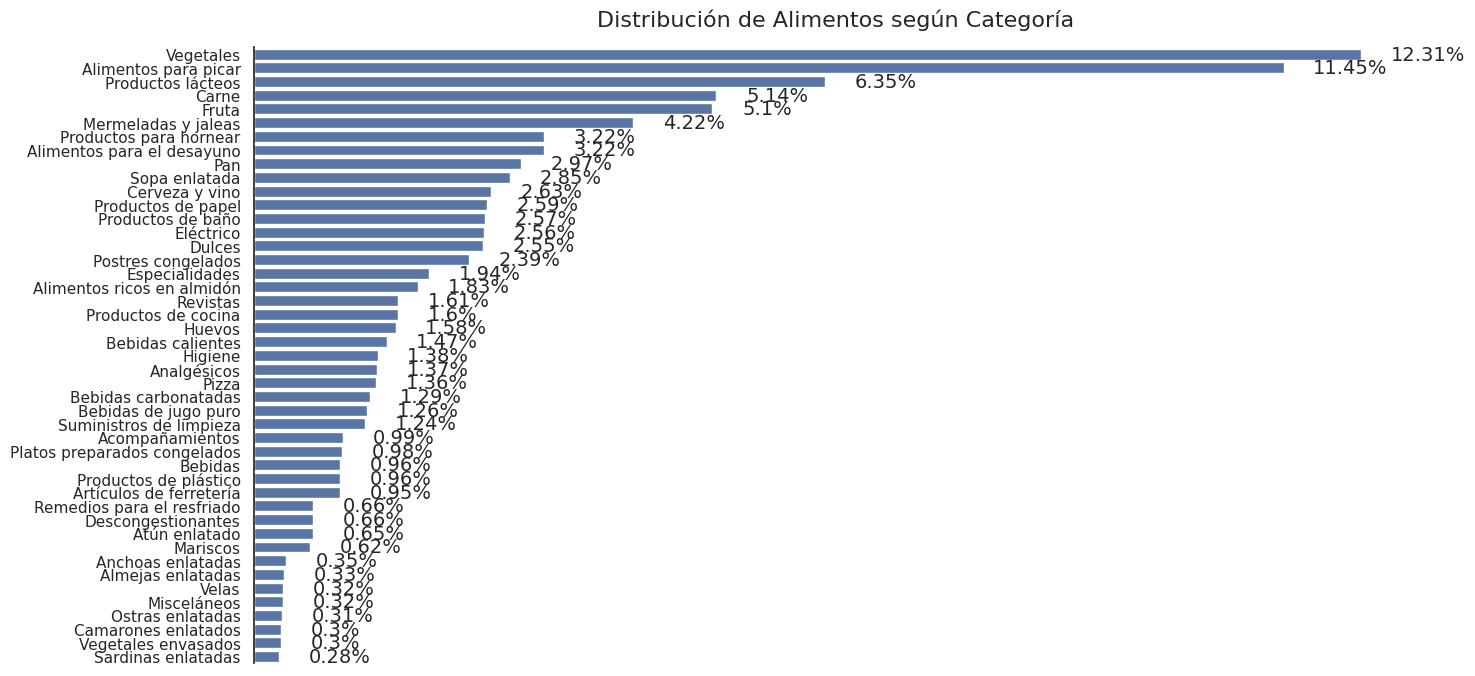

In [19]:
#@title
plt.figure(figsize=(15, 8))
custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                 "axes.spines.bottom": False}

sns.set_theme(context="notebook", style="white", rc=custom_params)


# Plotando el gráfico de barras y ocultando los puntos del eje X
ax = sns.countplot(data = datos_modificado, y = "categoria_alimento", order = datos_modificado.categoria_alimento.value_counts().index)
ax.set_xticklabels([])

plt.title("Distribución de Alimentos según Categoría", fontsize = 16, pad = 15)
plt.ylabel("")
plt.xlabel("")

# Escribiendo los valores de cada barra (eje X) en el gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_width()
  pos_y = barra.get_y() + barra.get_height() / 2
  offset = 200
  cantidad = f'{round(pos_x/len(datos_modificado)*100,2)}%'
  ax.text(x = pos_x + offset , y = pos_y, s = cantidad, va='center', fontsize=14)

<font color=black size=4> Observaciones e hipótesis: </font>

---

Si desglosamos el análisis de compra por Categoría de producto, podemos concluir que los clientes adquieren (mayoritariamente) productos de máxima necesidad como son: vegetales, lácteos, carne y frutas. También se observa que eventualmente adquieren productos para picar. El perfil de los clientes parece apuntar a adquirir lo necesariamente básico (casi un 24%) y productos para picar (11.45%).

##**4. Preprocesamiento y obtención de Features**



En primer lugar, a partir de la exploración de los datos y el análisis gráfico, procederemos a eliminar variables que no se consideran de utilidad para avanzar en el estudio.


###**4.1 Codificación de Variables Categóricas**

In [20]:
#@title
#Procedemos a seleccionar las variables categóricas con las que trabajaremos
columnas_categoricas=[
 'tipo',
 'genero',
 'miembro',
 'estado_civil',
 'pais',
 'ocupacion',
 'escolaridad',
 'comercio']

In [21]:
#@title
#Procedemos a seleccionar las variables numéricas con las que trabajaremos
columnas_numericas= [
  'ingreso_anual',
  'numero_hijos',
  'ventas_tienda(en millones)',
  'empaque_reciclable']

In [22]:
#@title
datos_dummy = pd.get_dummies(datos_modificado[columnas_categoricas], columns=columnas_categoricas)
datos_final_codificados = pd.concat([datos_modificado[columnas_numericas],datos_dummy], axis = 1)
datos_final_codificados.head(3)

ingreso_anual  numero_hijos  ventas_tienda(en millones)  \
0          20000           1.0                        7.36   
1          60000           0.0                        5.52   
2          20000           0.0                        3.68   

   empaque_reciclable  tipo_Bebida  tipo_Comida  tipo_No comestible  \
0                 1.0            0            1                   0   
1                 1.0            0            1                   0   
2                 1.0            0            1                   0   

   genero_Femenino  genero_Masculino  miembro_Bronce  miembro_No  miembro_Oro  \
0                1                 0               0           1            0   
1                0                 1               0           0            0   
2                1                 0               0           1            0   

   miembro_Plata  estado_civil_Casado  estado_civil_Soltero  pais_Canadá  \
0              0                    1                     0            0   
1              1                    1                     0            0   
2              0                    0                     1            0   

   pais_Estados Unidos  pais_México  ocupacion_Cargo de Oficina  \
0                    1            0                           0   
1                    1            0                           0   
2                    1            0                           0   

   ocupacion_Gestión  ocupacion_Obrero  ocupacion_Profesional  \
0                  0                 0                      0   
1                  0                 0                      1   
2                  0                 1                      0   

   ocupacion_Técnico  escolaridad_Maestría  escolaridad_Primaria  \
0                  1                     0                     1   
1                  0                     0                     0   
2                  0                     0                     1   

   escolaridad_Secundaria  escolaridad_Superior  escolaridad_Técnico  \
0                       0                     0                    0   
1                       0                     1                    0   
2                       0                     0                    0   

   comercio_Pequeño supermercado  comercio_Supermercado  \
0                              0                      0   
1                              0                      0   
2                              0                      0   

   comercio_Supermercado de lujo  comercio_Supermercado gourmet  \
0                              1                              0   
1                              1                              0   
2                              1                              0   

   comercio_Supermercado mediano  
0                              0  
1                              0  
2                              0

###**4.2 Estandarización de datos**

In [23]:
#@title
from sklearn.preprocessing import StandardScaler
X=datos_final_codificados
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[-1.06147109,  0.13092501,  0.23649007, ...,  1.27772043,
        -0.34726563, -0.22231772],
       [ 0.04675692, -0.63629147, -0.2948384 , ...,  1.27772043,
        -0.34726563, -0.22231772],
       [-1.06147109, -0.63629147, -0.82616687, ...,  1.27772043,
        -0.34726563, -0.22231772],
       ...,
       [-0.50735708, -0.63629147, -0.2948384 , ..., -0.78264382,
        -0.34726563, -0.22231772],
       [ 0.60087093, -0.63629147,  0.50215431, ..., -0.78264382,
        -0.34726563,  4.49806705],
       [-1.06147109, -0.63629147,  0.76781854, ..., -0.78264382,
        -0.34726563,  4.49806705]])

##**5. Clusterización y Validación**

###**5.1 Clusterización**

In [24]:
#@title
#Obtenemos las métricas según número de cluster
def obtener_metricas(datos):
  metricas = []
  for n_clusters in range(3, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(datos)
    cluster_labels = kmeans.labels_

    silhouette = silhouette_score(datos, cluster_labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(datos, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(datos, cluster_labels)

    metricas.append({
        'Clusters': n_clusters,
        'Silhouette': silhouette,
        'Davies-Bouldin': davies_bouldin,
        'Calinski-Harabasz': calinski_harabasz
         })

    dfc_metricas = pd.DataFrame(metricas)

  return dfc_metricas

In [25]:
#@title
obtener_metricas(X_std)

Clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz
0         3    0.086098        3.038252        4828.279695
1         4    0.101267        2.848470        4356.249981
2         5    0.110370        2.526559        4009.003254
3         6    0.116499        2.331596        3907.672345
4         7    0.109675        2.446596        3615.124041
5         8    0.108211        2.531560        3453.743908
6         9    0.103113        2.290261        3326.631811
7        10    0.120456        2.179175        3473.925723

Las métricas con datos estandarizados dan valores no aceptados, por lo que se decide proceder a obtener las métricas con los datos no estandarizados.

In [26]:
#@title
obtener_metricas(datos_final_codificados)

Clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz
0         3    0.697580        0.493429       2.448591e+05
1         4    0.722207        0.400474       3.014342e+05
2         5    0.911131        0.273154       5.251393e+05
3         6    0.944840        0.297978       1.065072e+06
4         7    0.977956        0.159802       2.249253e+06
5         8    0.999726        0.000394       6.275677e+11
6         9    0.792888        0.234923       6.437054e+11
7        10    0.652216        0.421678       6.428458e+11

Las métricas con datos no estandarizados dan valores dentro de los márgenes aceptados, por lo que se decide continuar con dichos datos.

###**5.2 Número de clusters**

In [27]:
#@title
#Obtenemos la inercia para cada número de clusters
def obtener_inercia(datos):
  inercia = []
  for k in range(3,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X=datos)
    cluster_labels = kmeans.labels_
    inercia.append(kmeans.inertia_)
  return inercia

In [28]:
#@title
suma_cuadrados = obtener_inercia(datos_final_codificados)

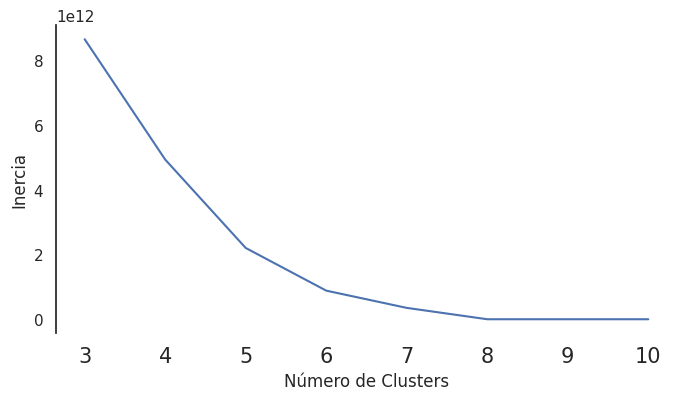

In [29]:
#@title
plt.figure(figsize = (8,4))
plt.plot(suma_cuadrados)
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['3', '4', '5','6','7','8','9','10'],fontsize=15)

plt.show()

In [30]:
#@title
#Mediante la Regla Matemática encontramos el mejor número de clusters
def numero_ideal_clusters(inercia):
  x1, y1 = 3, inercia[0]
  x2, y2 = 10, inercia[-1]

  distancia = []

  for i in range(len(inercia)):
    x0 = i + 2
    y0 = inercia[i]
    numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominador = ((y2-y1)**2 + (x2-x1)**2)**(1/2)
    distancia.append(numerador/denominador)

  return distancia.index(max(distancia)) + 3

In [31]:
#@title
print(f'El número ideal de clusters es: {numero_ideal_clusters(suma_cuadrados)}')

El número ideal de clusters es: 6


###**5.3 Estructura de los clusters**

In [32]:
#@title
#Verificamos número de filas y columnas del DataFrame
datos_final_codificados.shape

(60428, 33)

In [33]:
#@title
#Generamos los datos aleatorios
random_data = np.random.rand(60428,33)

#Calculamos la inercia de random_data
datos_random_metricas = obtener_metricas(random_data)
datos_random_metricas

Clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz
0         3    0.018600        5.937545        1155.833513
1         4    0.018527        5.820639        1018.082664
2         5    0.017838        5.310176         901.973881
3         6    0.017313        5.107946         819.855264
4         7    0.017425        4.906217         760.175541
5         8    0.017287        4.827686         708.305141
6         9    0.017183        4.626045         665.949691
7        10    0.017045        4.491241         629.369759

A partir de las métricas obtenidas en "random_data", podemos aseverar que nuestro DataFrame tiene un desempeño muy superior.

###**5.4 Estabilidad de los clusters**

In [34]:
#@title
#Se segmenta el conjunto de datos en 4 partes
set_1, set_2, set_3 = np.array_split(datos_final_codificados, 3)
sets = [set_1, set_2, set_3]

In [35]:
#@title
# Creamos un DataFrame para almacenar los resultados de cada set
df_sets = pd.DataFrame(columns=['Set', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])

#Creamos listas para guardar las métricas
set_n = []
n = 1
silhouette = []
davies_bouldin = []
calinski_harabasz = []

for set in sets:
  #Realizamos la prediccion del Kmeans
  kmeans = KMeans(n_clusters= 6, n_init = 10, random_state=42)
  kmeans.fit(X = set)
  preds = kmeans.fit_predict(set)

  #Almacenamos los coeficientes en sus respectivos arrays
  set_n.append(n)
  silhouette.append(silhouette_score(set, preds, metric='euclidean'))
  davies_bouldin.append(davies_bouldin_score(set, preds))
  calinski_harabasz.append(calinski_harabasz_score(set, preds))

  df_sets = df_sets.append({'Set': set_n[n-1],
                                 'Silhouette': silhouette[n-1],
                                 'Davies-Bouldin': davies_bouldin[n-1],
                                 'Calinski-Harabasz': calinski_harabasz[n-1]},
                                ignore_index=True)
  n+=1

df_sets

Set  Silhouette  Davies-Bouldin  Calinski-Harabasz
0  1.0    0.945968        0.297158      359532.164888
1  2.0    0.944420        0.298820      349963.149309
2  3.0    0.944099        0.297872      355562.486189

In [36]:
#@title
#Realizamos comprobación de diferencias +/- 5% entre métricas de los sets
col= df_sets.drop(columns='Set')
for column in col.columns:
  if (100 - (min(col[column])/max(col[column])*100)) < 5:
    print(f'Para la métrica {column} se respeta el porcentaje de tolerancia del 5% ({100 - (min(col[column])/max(col[column])*100)} %)')
  else:
    print(f'Para la métrica {column} no se respeta el porcentaje de tolerancia del 5% ({100 - (min(col[column])/max(col[column])*100)} %)')

Para la métrica Silhouette se respeta el porcentaje de tolerancia del 5% (0.19755587132546282 %)
Para la métrica Davies-Bouldin se respeta el porcentaje de tolerancia del 5% (0.5559716007569051 %)
Para la métrica Calinski-Harabasz se respeta el porcentaje de tolerancia del 5% (2.6615186382389027 %)


###**5.5 Instanciando la mejor configuración de clusters**

In [37]:
#@title
# DataFrame de entrada
datos_conclusiones = datos_final_codificados

# Instanciar KMeans con n_clusters=6
kmeans = KMeans(n_clusters=6, random_state=42)

# Ajustar KMeans a tus datos y obtener las etiquetas de clúster
datos_conclusiones['cluster'] = kmeans.fit_predict(datos_conclusiones)

In [38]:
#@title
datos_conclusiones.head()

ingreso_anual  numero_hijos  ventas_tienda(en millones)  \
0          20000           1.0                        7.36   
1          60000           0.0                        5.52   
2          20000           0.0                        3.68   
3          40000           2.0                        3.68   
4          40000           0.0                        4.08   

   empaque_reciclable  tipo_Bebida  tipo_Comida  tipo_No comestible  \
0                 1.0            0            1                   0   
1                 1.0            0            1                   0   
2                 1.0            0            1                   0   
3                 1.0            0            1                   0   
4                 0.0            0            1                   0   

   genero_Femenino  genero_Masculino  miembro_Bronce  miembro_No  miembro_Oro  \
0                1                 0               0           1            0   
1                0                 1               0           0            0   
2                1                 0               0           1            0   
3                1                 0               1           0            0   
4                0                 1               1           0            0   

   miembro_Plata  estado_civil_Casado  estado_civil_Soltero  pais_Canadá  \
0              0                    1                     0            0   
1              1                    1                     0            0   
2              0                    0                     1            0   
3              0                    1                     0            0   
4              0                    1                     0            0   

   pais_Estados Unidos  pais_México  ocupacion_Cargo de Oficina  \
0                    1            0                           0   
1                    1            0                           0   
2                    1            0                           0   
3                    1            0                           0   
4                    1            0                           0   

   ocupacion_Gestión  ocupacion_Obrero  ocupacion_Profesional  \
0                  0                 0                      0   
1                  0                 0                      1   
2                  0                 1                      0   
3                  0                 1                      0   
4                  0                 0                      0   

   ocupacion_Técnico  escolaridad_Maestría  escolaridad_Primaria  \
0                  1                     0                     1   
1                  0                     0                     0   
2                  0                     0                     1   
3                  0                     0                     0   
4                  1                     0                     1   

   escolaridad_Secundaria  escolaridad_Superior  escolaridad_Técnico  \
0                       0                     0                    0   
1                       0                     1                    0   
2                       0                     0                    0   
3                       1                     0                    0   
4                       0                     0                    0   

   comercio_Pequeño supermercado  comercio_Supermercado  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   comercio_Supermercado de lujo  comercio_Supermercado gourmet  \
0                              1                              0   
1                              1                              0   
2                              1                              0   


In [39]:
#@title
datos_conclusiones.cluster.unique()

array([3, 0, 2, 5, 4, 1], dtype=int32)

###**5.6 Análisis gráfico de clusters**

###**Ingreso Anual**

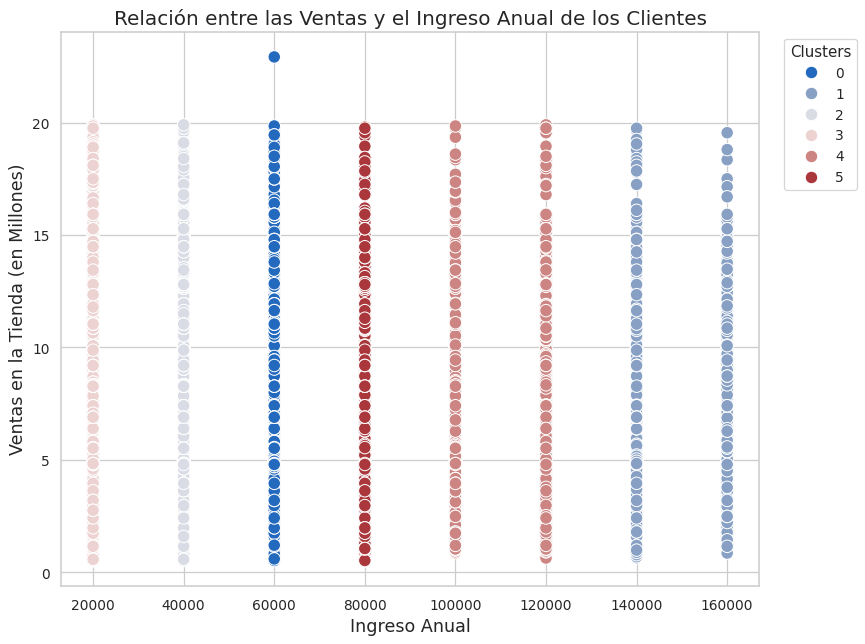

In [40]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='ingreso_anual', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y el Ingreso Anual de los Clientes", fontsize=16)
plt.xlabel("Ingreso Anual", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()


###**Número de Hijos**

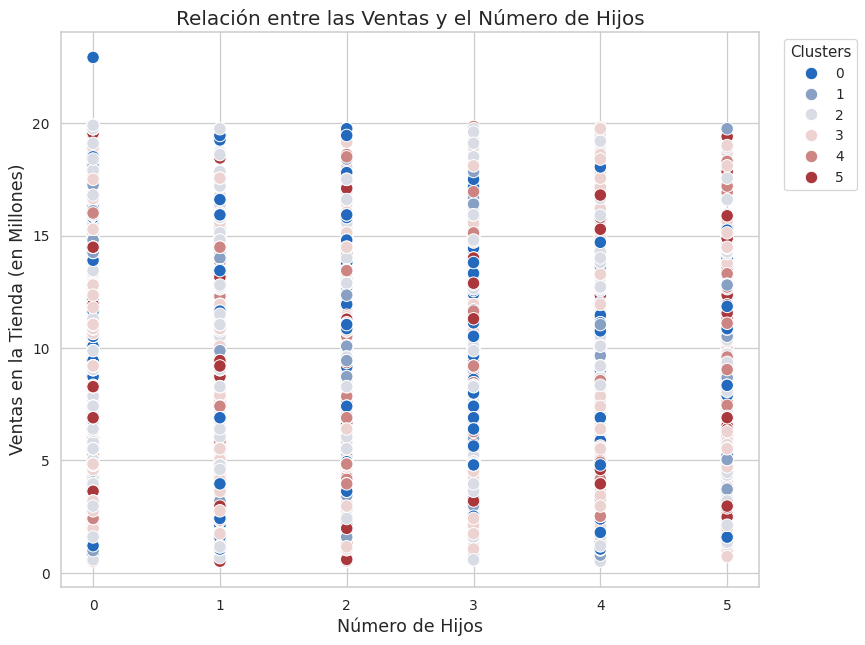

In [41]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='numero_hijos', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y el Número de Hijos", fontsize=16)
plt.xlabel("Número de Hijos", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

###**Tipo de Producto**

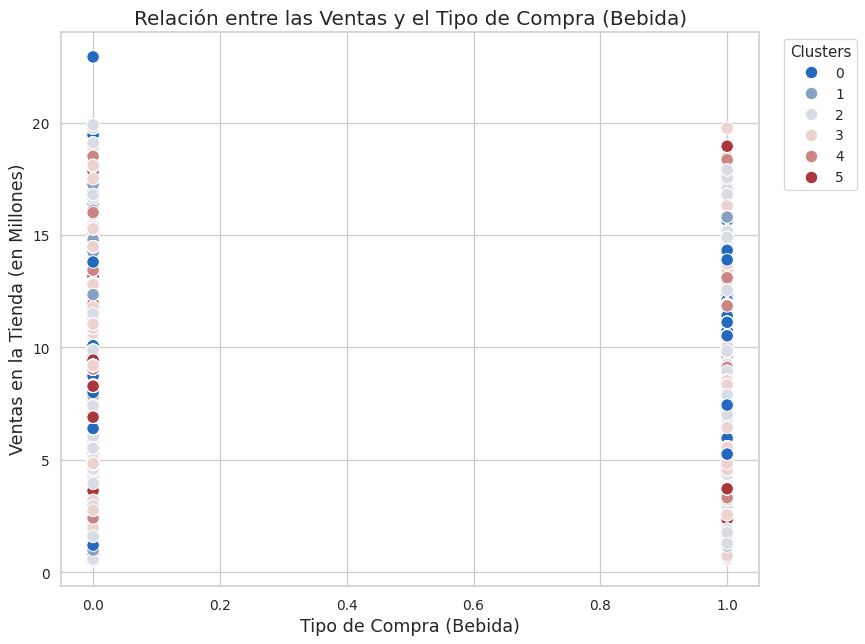

In [42]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='tipo_Bebida', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y el Tipo de Compra (Bebida)", fontsize=16)
plt.xlabel("Tipo de Compra (Bebida)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

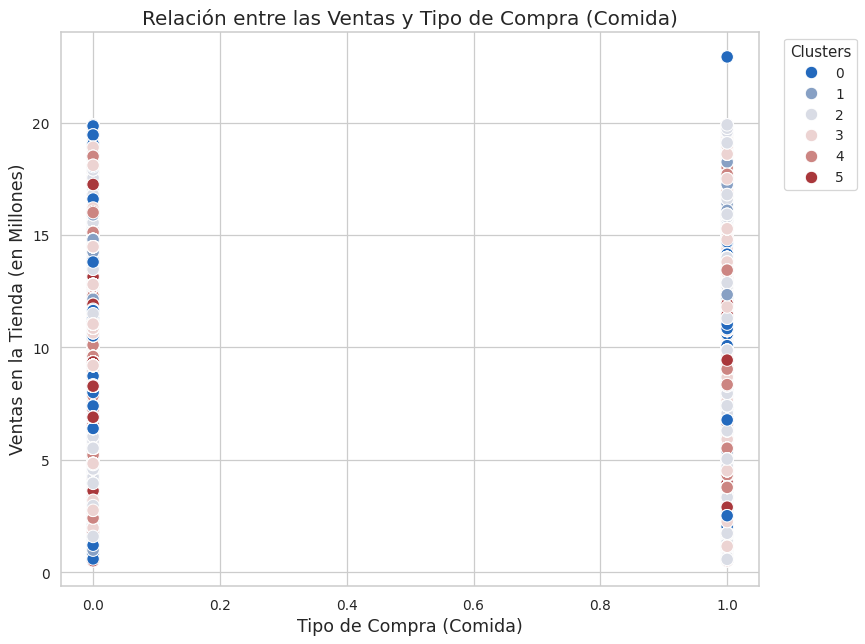

In [43]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='tipo_Comida', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Tipo de Compra (Comida)", fontsize=16)
plt.xlabel("Tipo de Compra (Comida)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

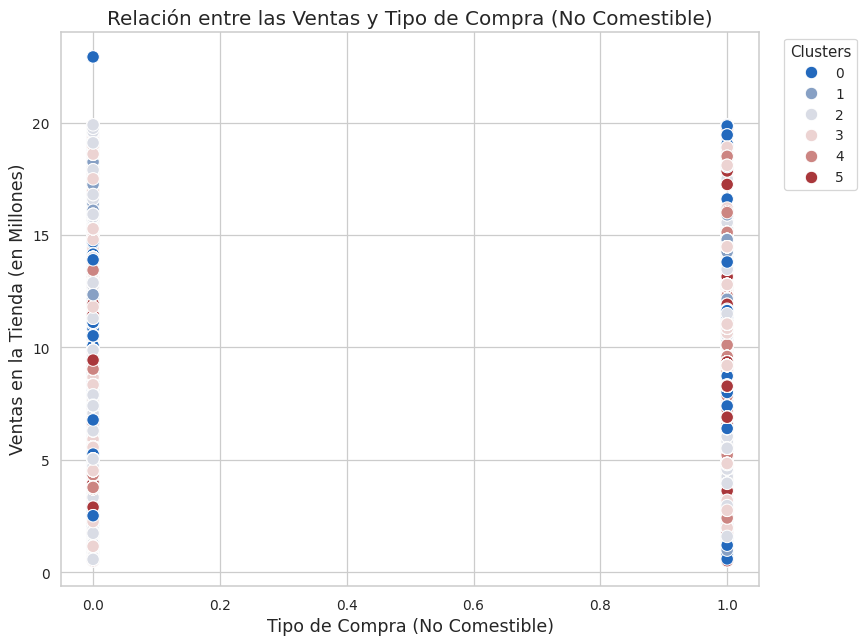

In [44]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='tipo_No comestible', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Tipo de Compra (No Comestible)", fontsize=16)
plt.xlabel("Tipo de Compra (No Comestible)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

###**Género**

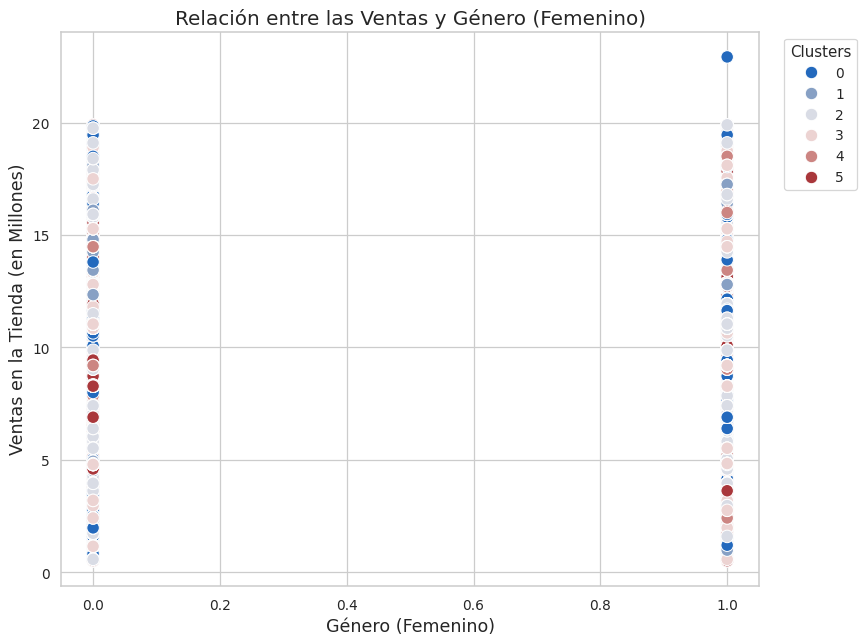

In [45]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='genero_Femenino', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Género (Femenino)", fontsize=16)
plt.xlabel("Género (Femenino)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

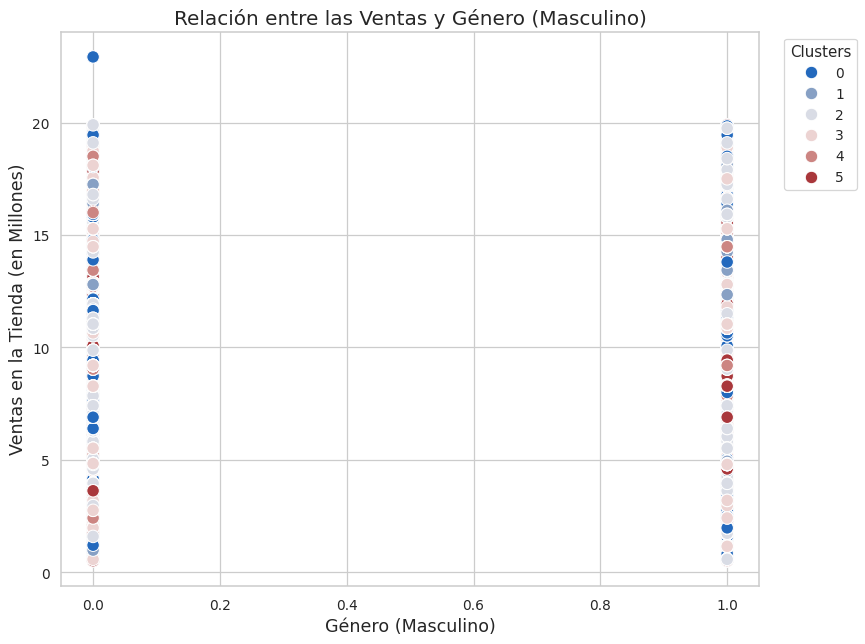

In [46]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='genero_Masculino', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Género (Masculino)", fontsize=16)
plt.xlabel("Género (Masculino)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

###**Membresía**

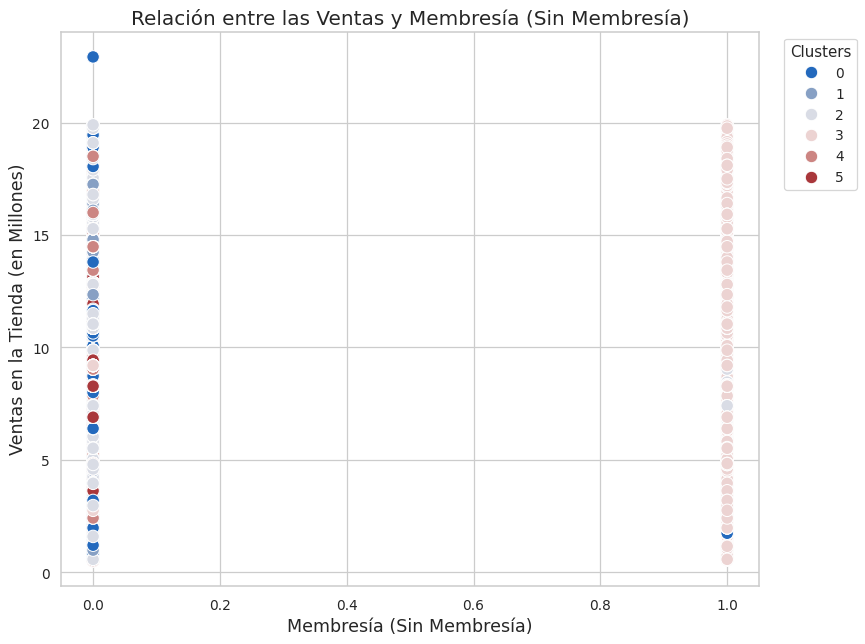

In [47]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='miembro_No', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Membresía (Sin Membresía)", fontsize=16)
plt.xlabel("Membresía (Sin Membresía)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

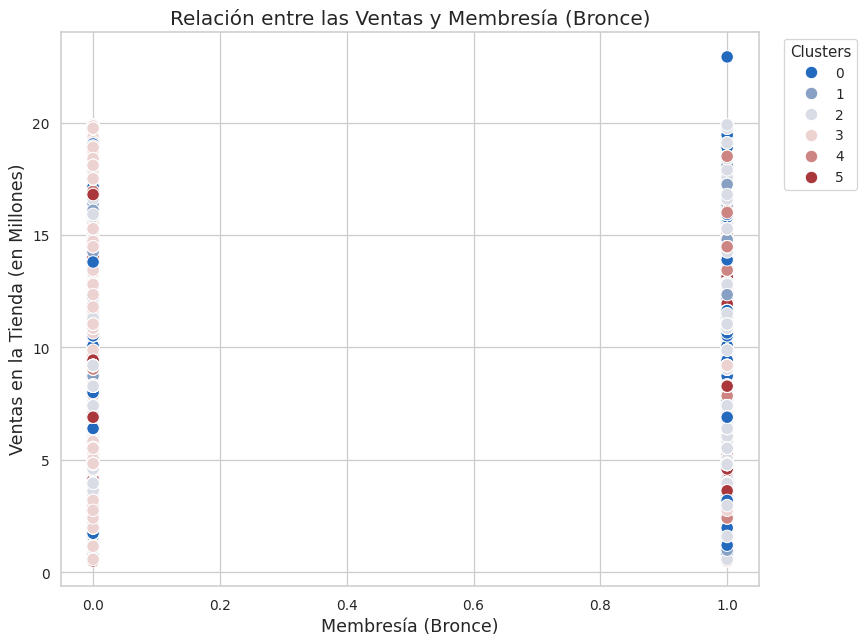

In [48]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='miembro_Bronce', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Membresía (Bronce)", fontsize=16)
plt.xlabel("Membresía (Bronce)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

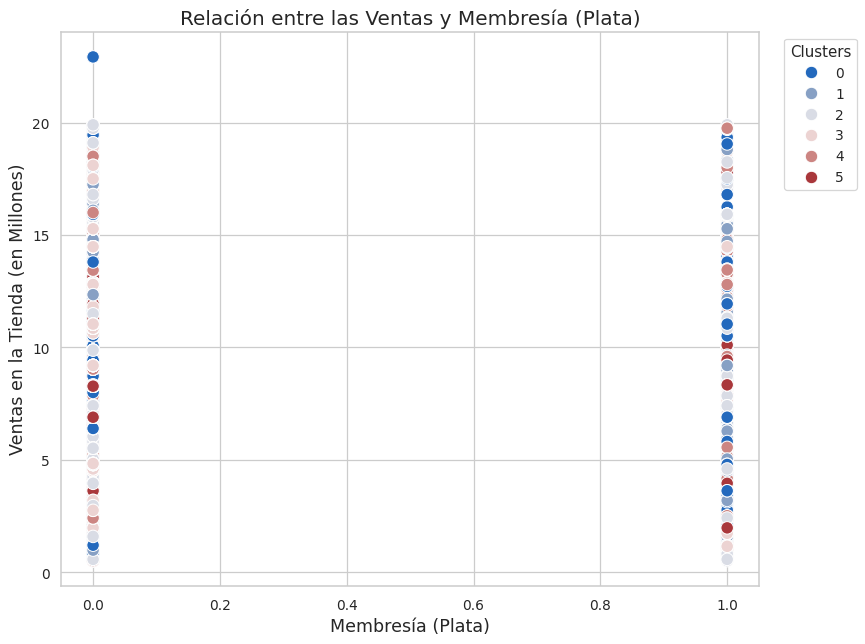

In [49]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='miembro_Plata', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Membresía (Plata)", fontsize=16)
plt.xlabel("Membresía (Plata)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

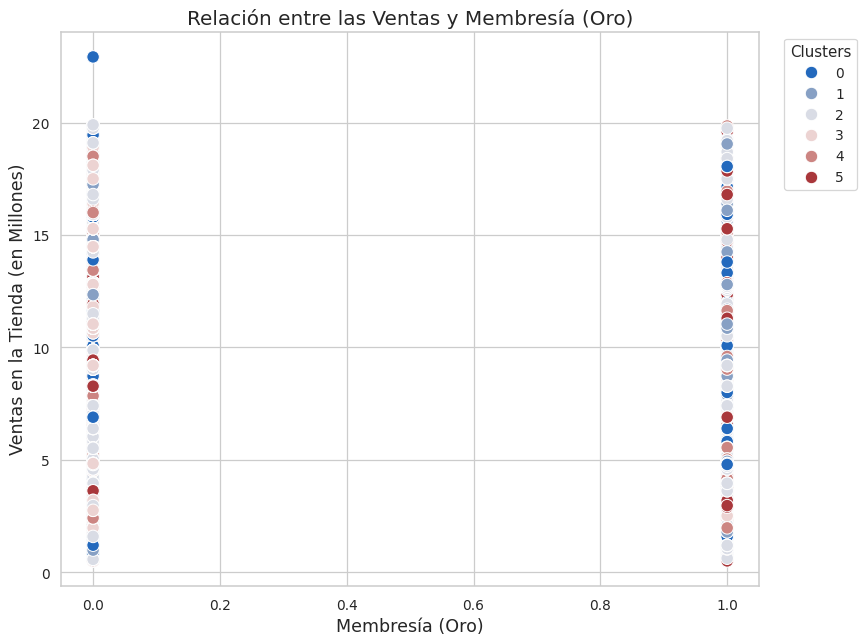

In [50]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='miembro_Oro', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Membresía (Oro)", fontsize=16)
plt.xlabel("Membresía (Oro)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

###**Estado Civil**

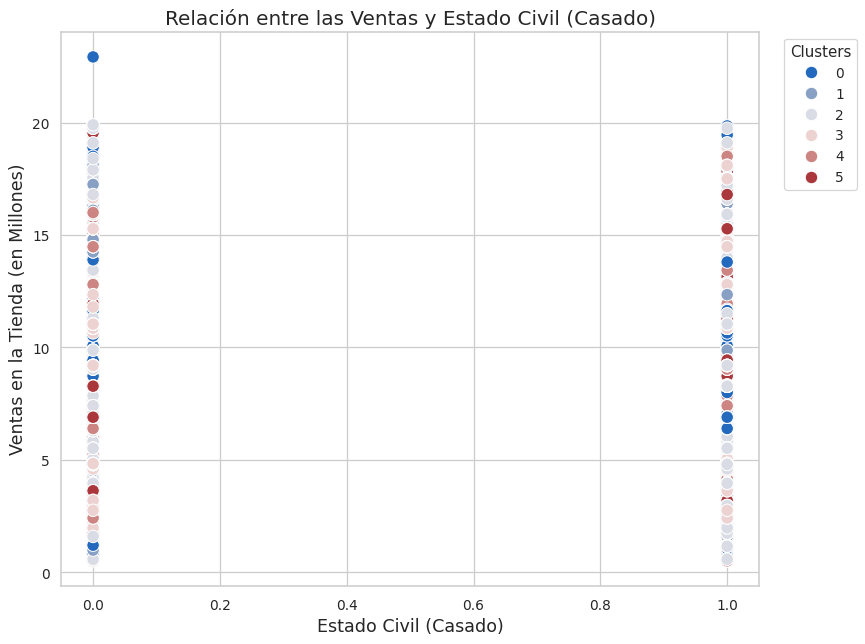

In [51]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='estado_civil_Casado', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Estado Civil (Casado)", fontsize=16)
plt.xlabel("Estado Civil (Casado)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

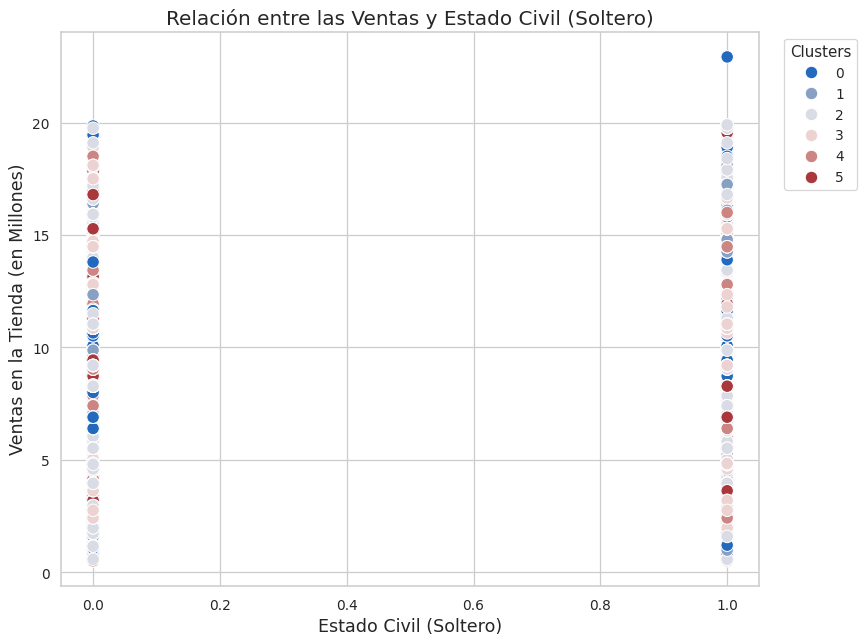

In [52]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='estado_civil_Soltero', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Estado Civil (Soltero)", fontsize=16)
plt.xlabel("Estado Civil (Soltero)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

###**País**

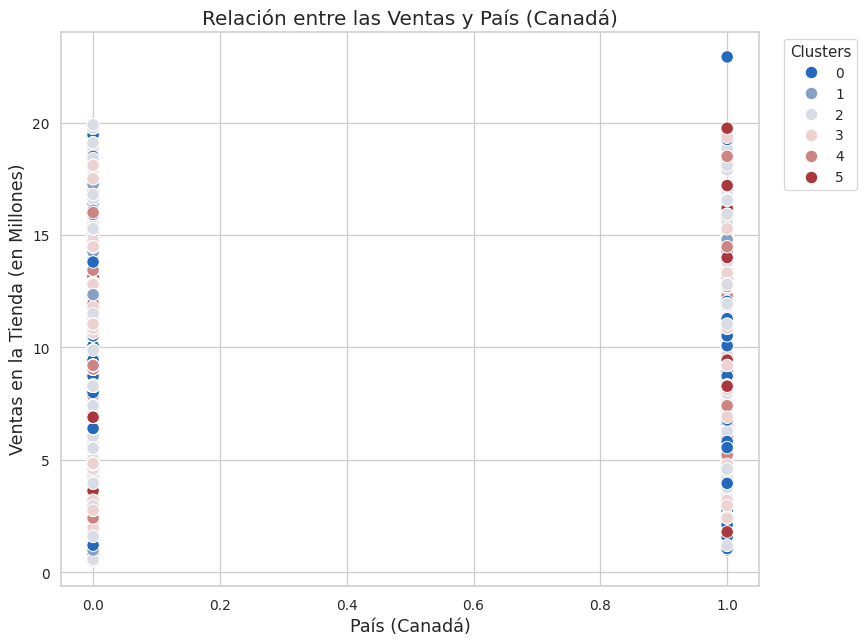

In [53]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='pais_Canadá', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y País (Canadá)", fontsize=16)
plt.xlabel("País (Canadá)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

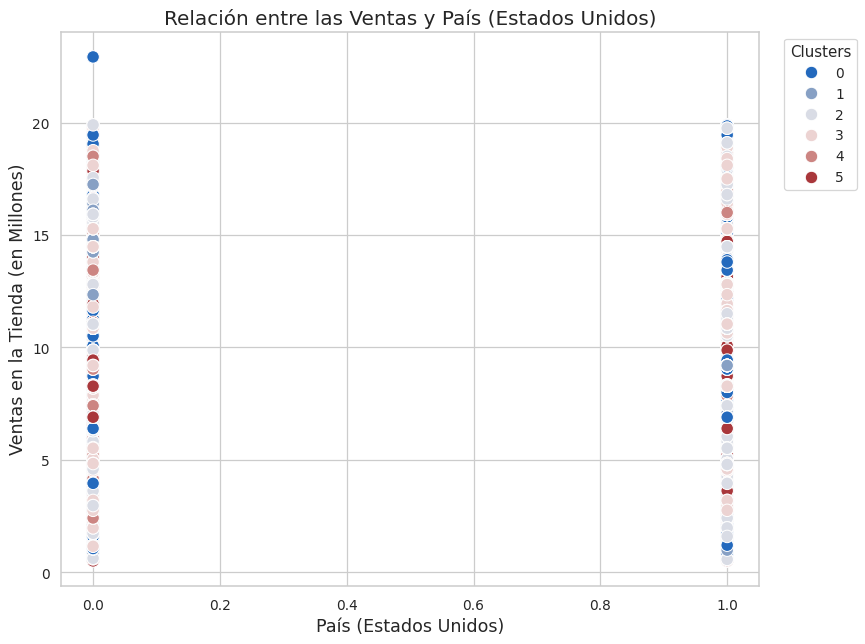

In [54]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='pais_Estados Unidos', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y País (Estados Unidos)", fontsize=16)
plt.xlabel("País (Estados Unidos)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

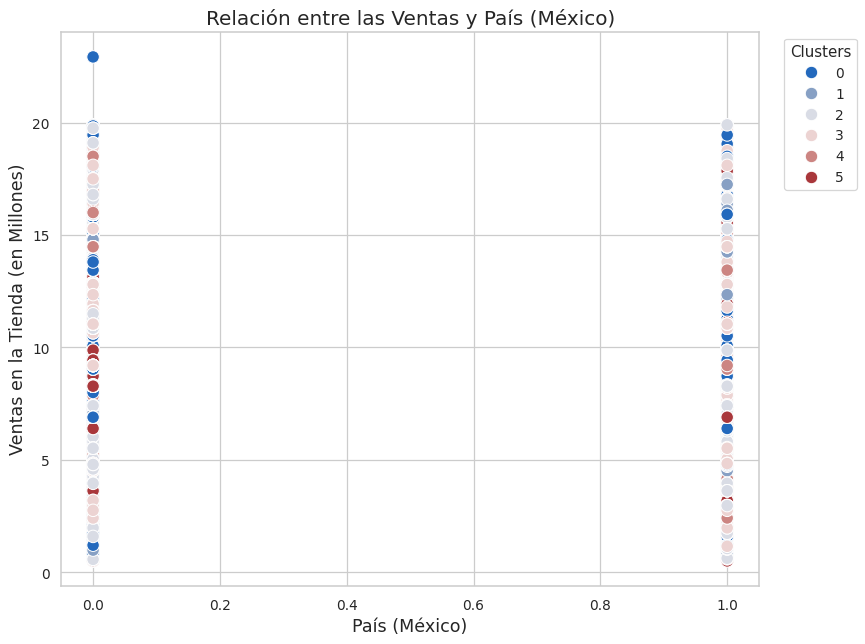

In [55]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='pais_México', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y País (México)", fontsize=16)
plt.xlabel("País (México)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

###**Ocupación**

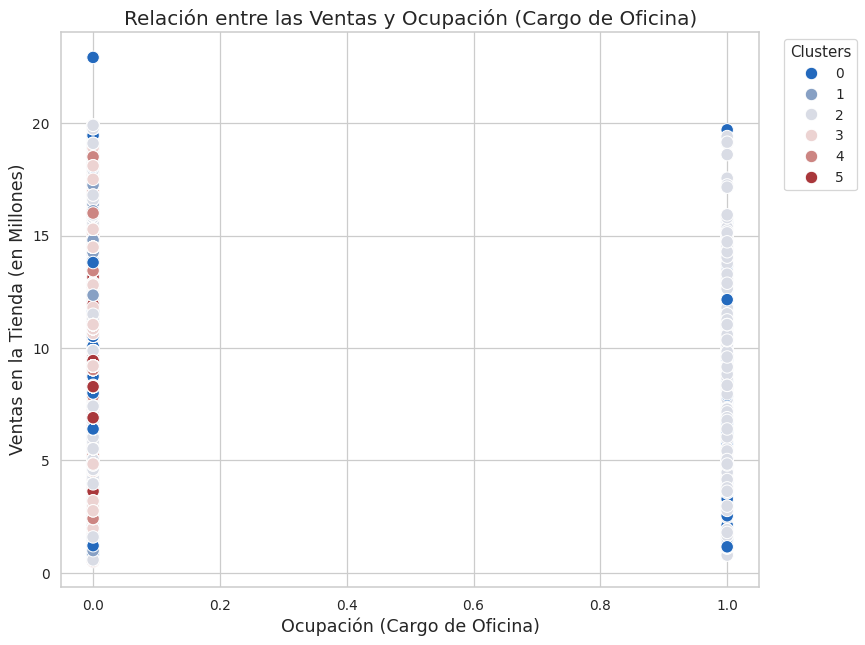

In [56]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='ocupacion_Cargo de Oficina', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Ocupación (Cargo de Oficina)", fontsize=16)
plt.xlabel("Ocupación (Cargo de Oficina)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

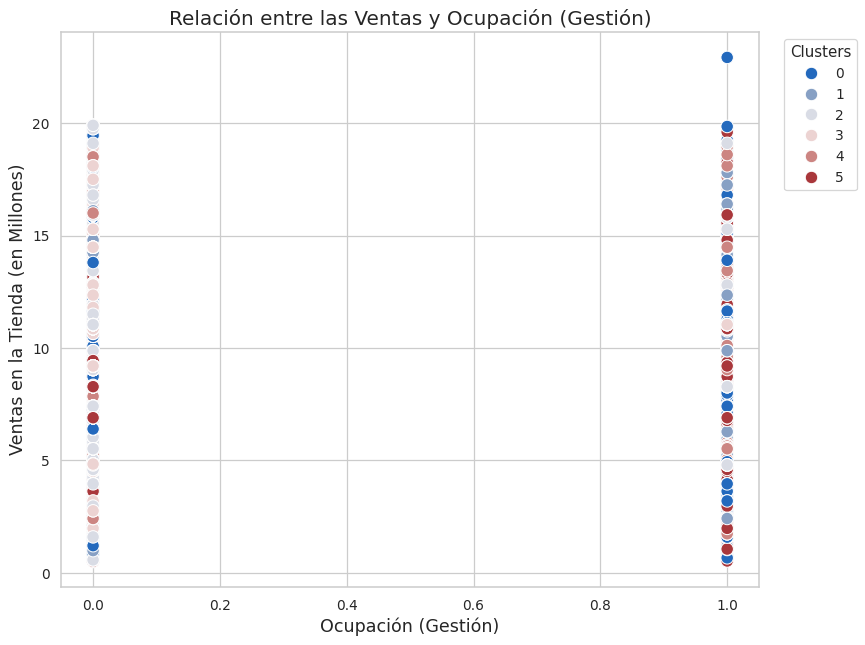

In [57]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='ocupacion_Gestión', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Ocupación (Gestión)", fontsize=16)
plt.xlabel("Ocupación (Gestión)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

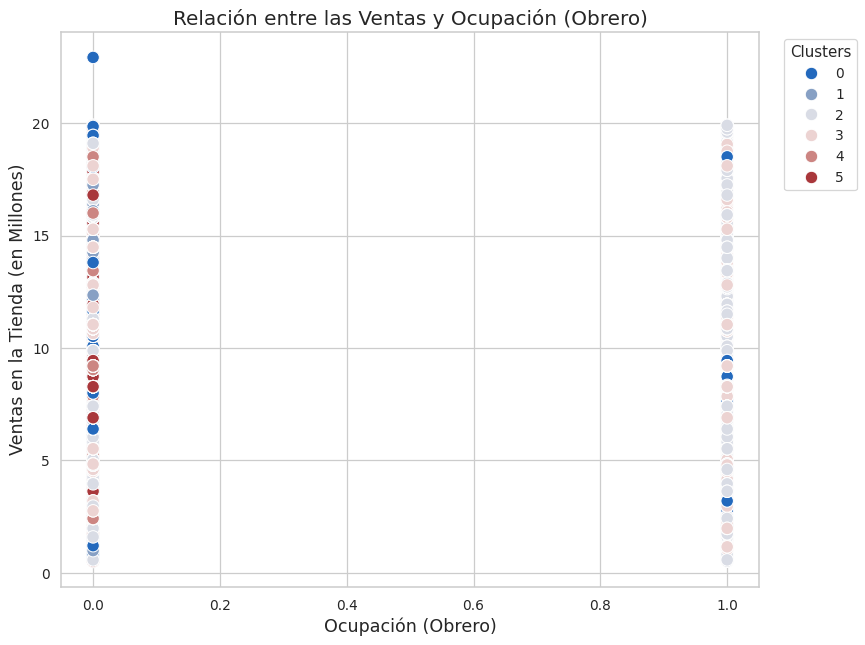

In [58]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='ocupacion_Obrero', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Ocupación (Obrero)", fontsize=16)
plt.xlabel("Ocupación (Obrero)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

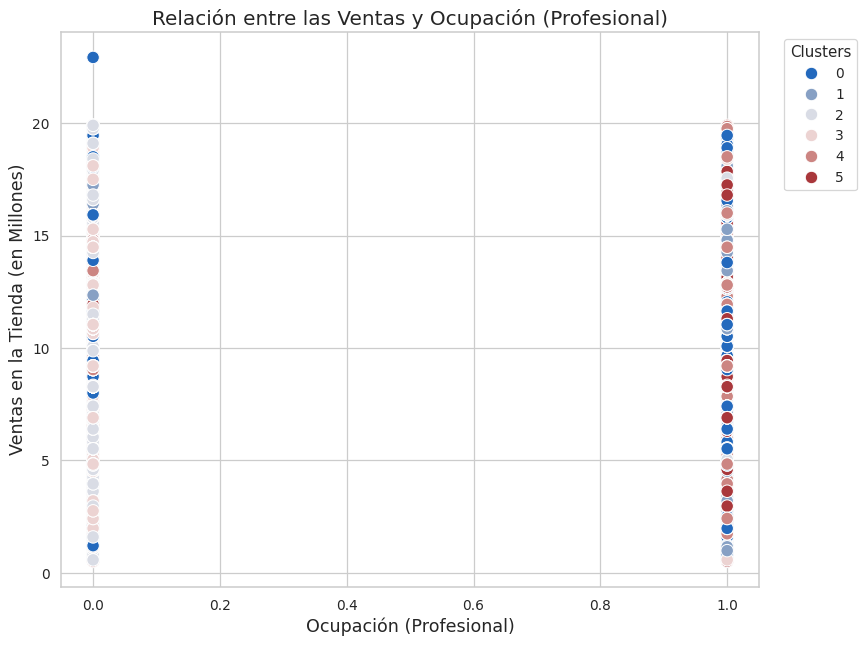

In [59]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='ocupacion_Profesional', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Ocupación (Profesional)", fontsize=16)
plt.xlabel("Ocupación (Profesional)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

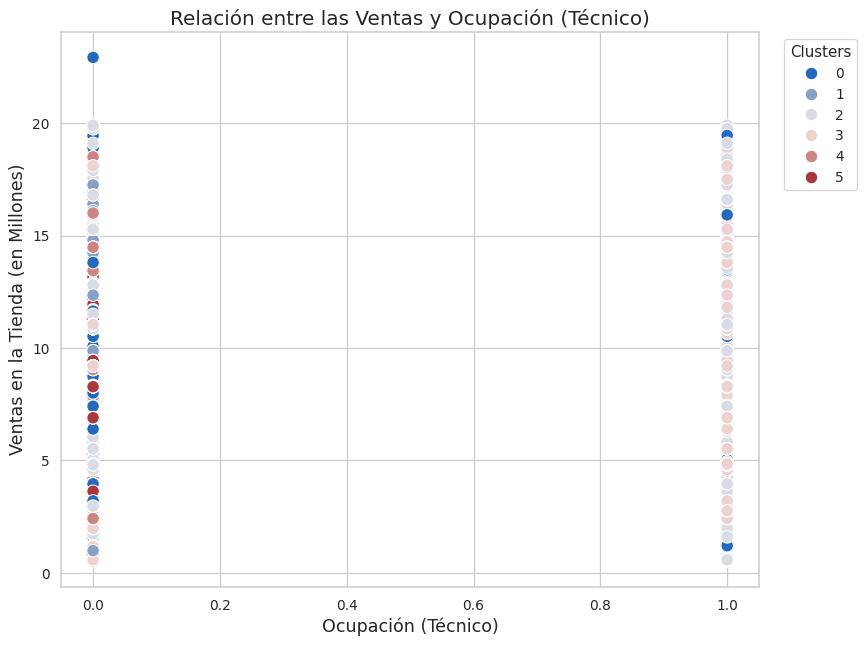

In [60]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='ocupacion_Técnico', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Ocupación (Técnico)", fontsize=16)
plt.xlabel("Ocupación (Técnico)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

###**Escolaridad**

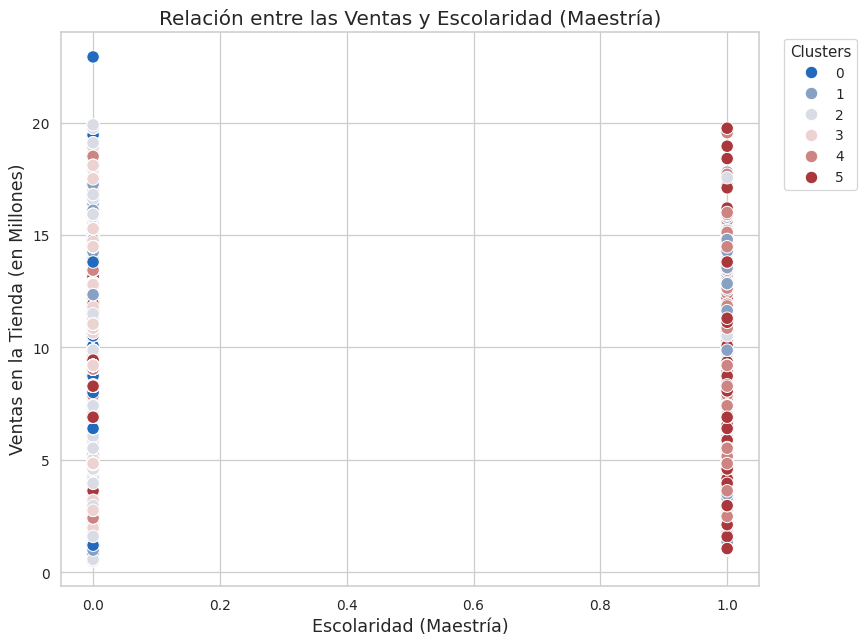

In [61]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='escolaridad_Maestría', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Escolaridad (Maestría)", fontsize=16)
plt.xlabel("Escolaridad (Maestría)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

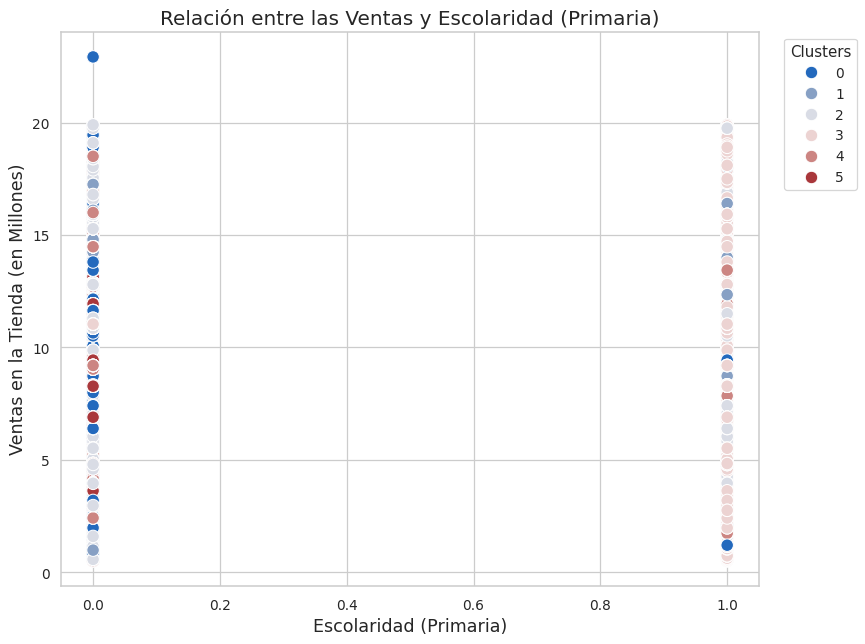

In [62]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='escolaridad_Primaria', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Escolaridad (Primaria)", fontsize=16)
plt.xlabel("Escolaridad (Primaria)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

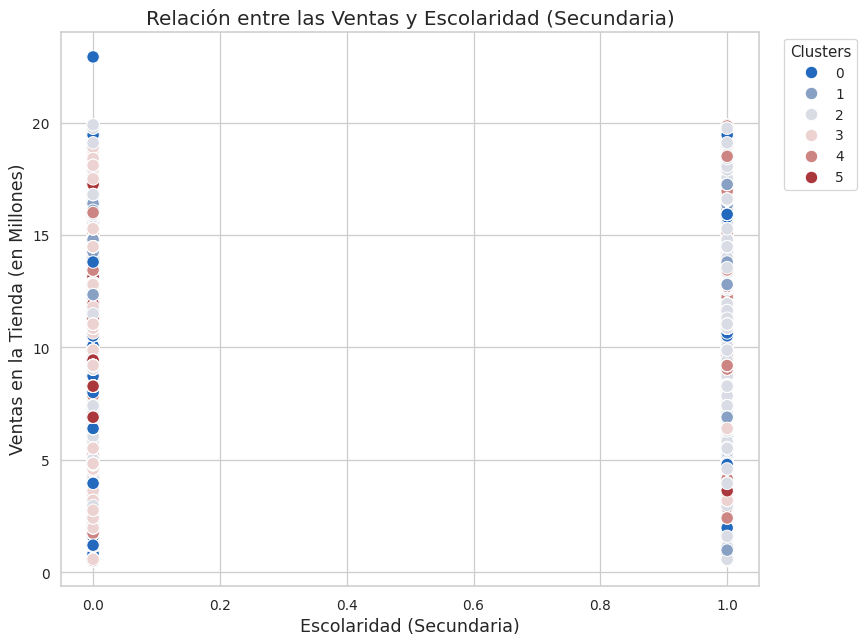

In [63]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='escolaridad_Secundaria', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Escolaridad (Secundaria)", fontsize=16)
plt.xlabel("Escolaridad (Secundaria)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

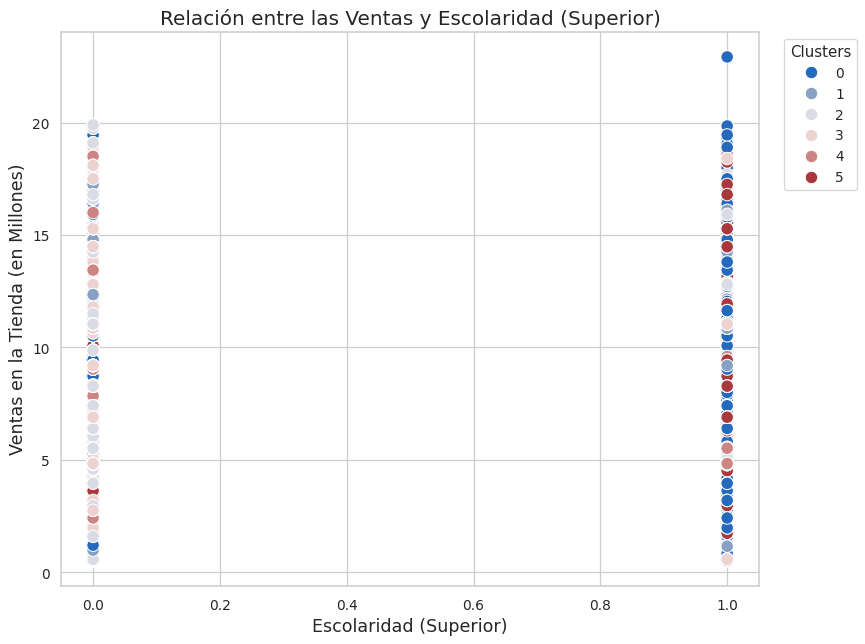

In [64]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='escolaridad_Superior', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Escolaridad (Superior)", fontsize=16)
plt.xlabel("Escolaridad (Superior)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

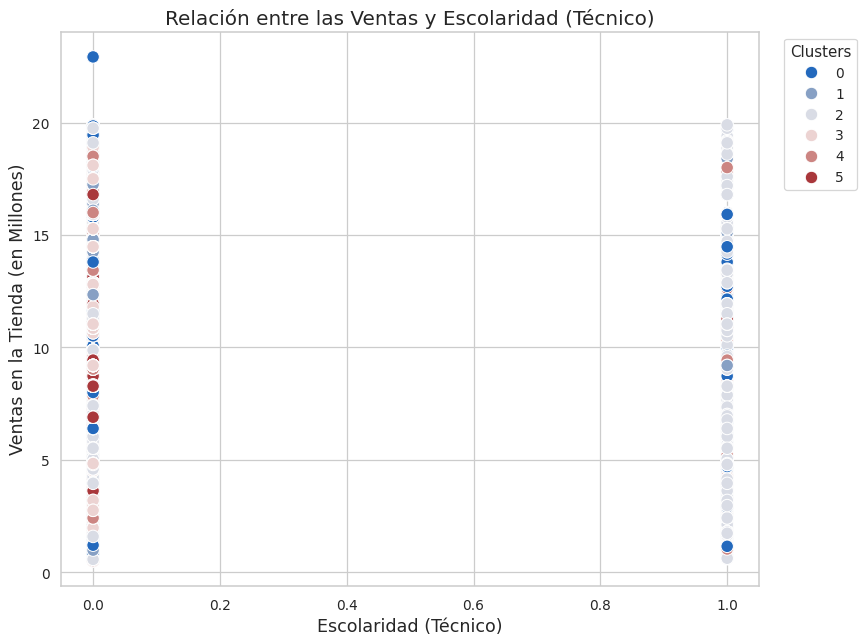

In [65]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='escolaridad_Técnico', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Escolaridad (Técnico)", fontsize=16)
plt.xlabel("Escolaridad (Técnico)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

###**Comercio**

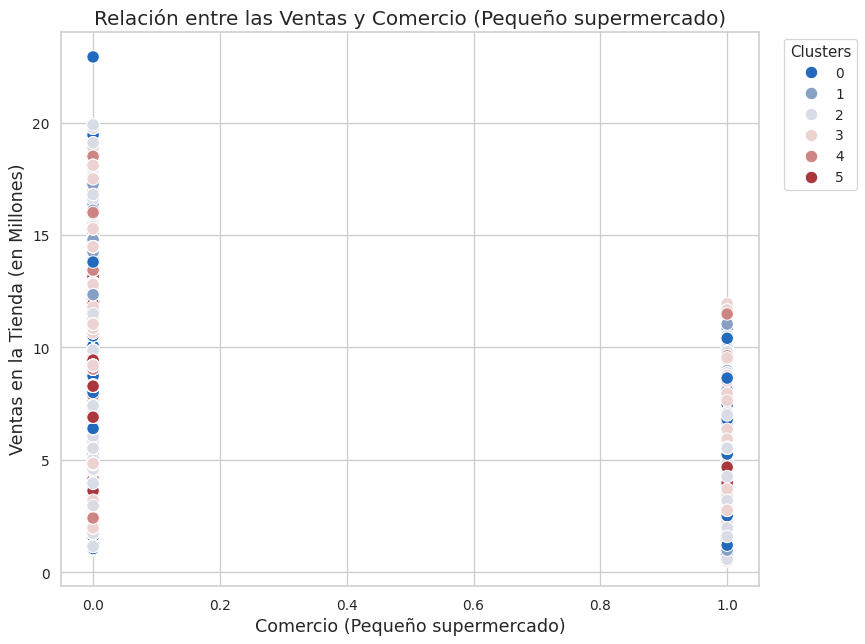

In [66]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='comercio_Pequeño supermercado', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Comercio (Pequeño supermercado)", fontsize=16)
plt.xlabel("Comercio (Pequeño supermercado)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

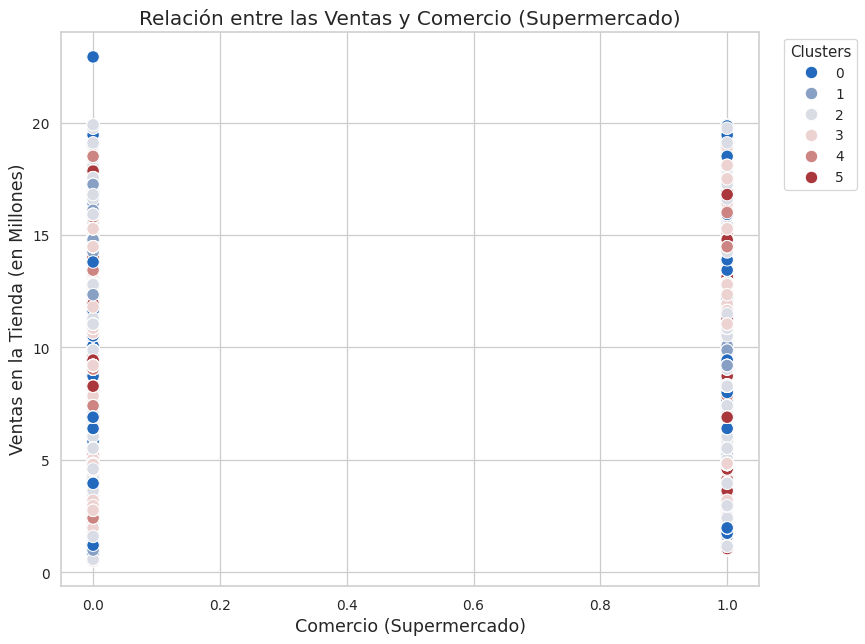

In [67]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='comercio_Supermercado', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Comercio (Supermercado)", fontsize=16)
plt.xlabel("Comercio (Supermercado)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

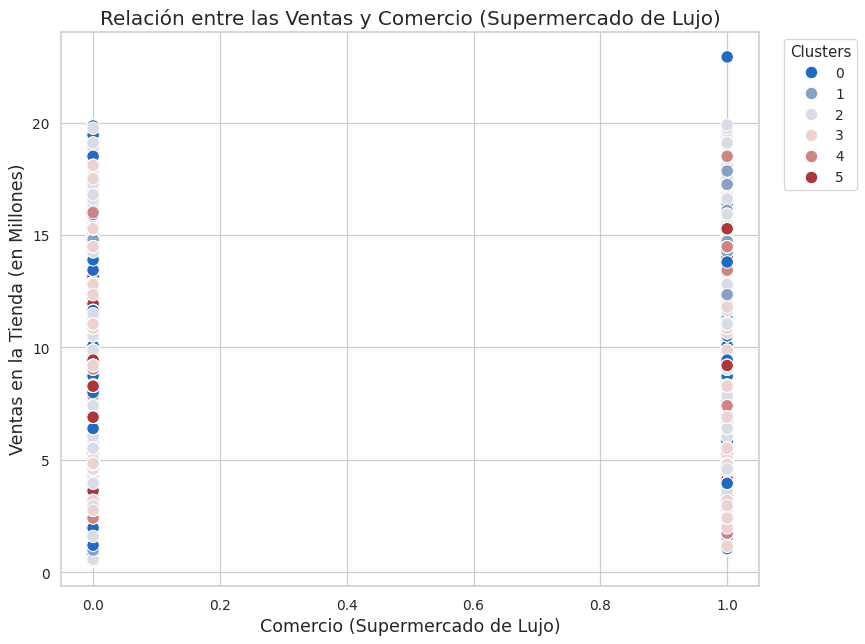

In [68]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='comercio_Supermercado de lujo', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Comercio (Supermercado de Lujo)", fontsize=16)
plt.xlabel("Comercio (Supermercado de Lujo)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

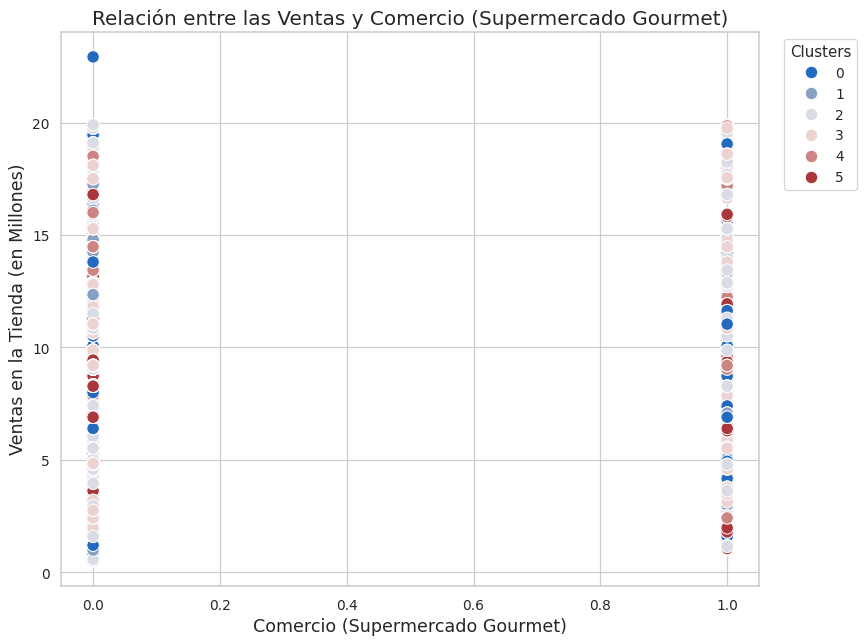

In [69]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='comercio_Supermercado gourmet', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Comercio (Supermercado Gourmet)", fontsize=16)
plt.xlabel("Comercio (Supermercado Gourmet)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

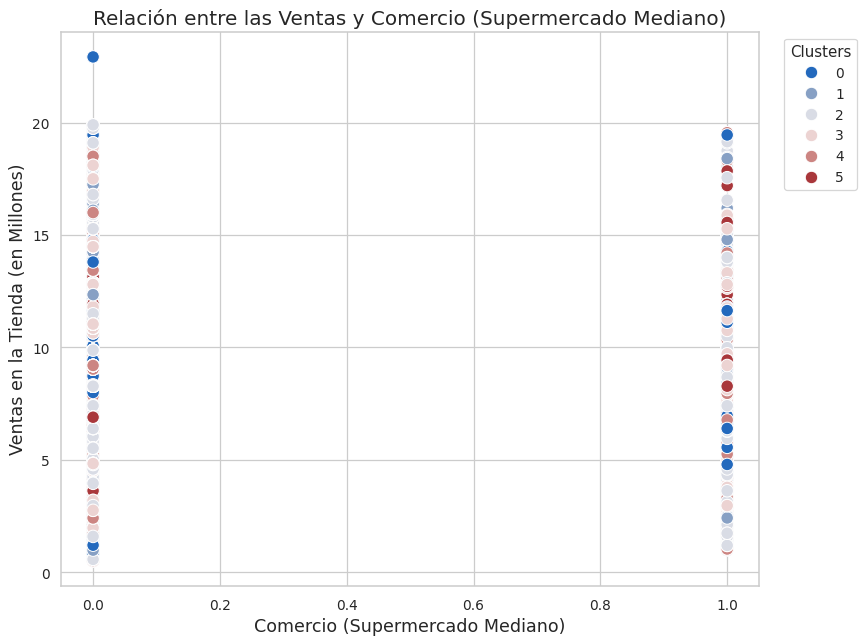

In [70]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='comercio_Supermercado mediano', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Comercio (Supermercado Mediano)", fontsize=16)
plt.xlabel("Comercio (Supermercado Mediano)", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

###**Empaque Reciclable**

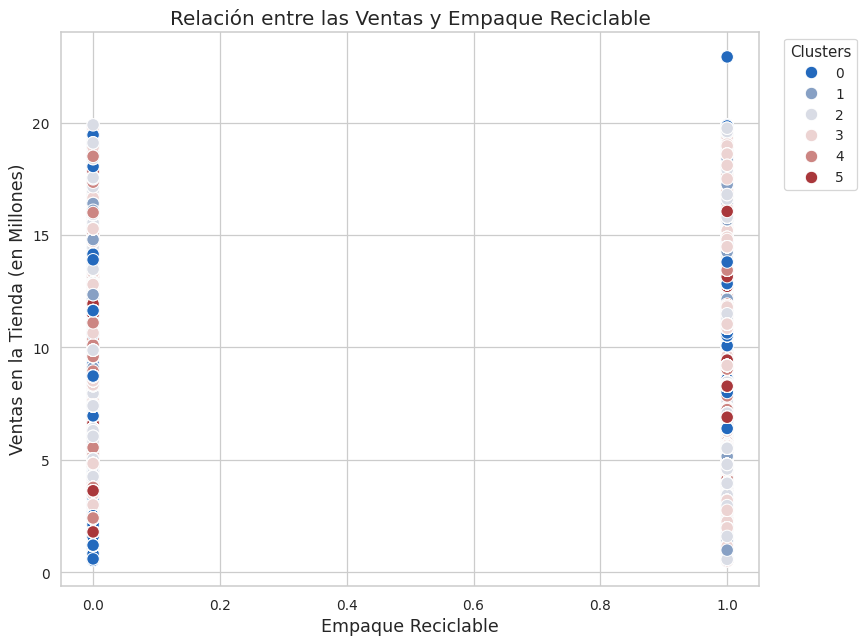

In [71]:
#@title
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos_conclusiones, x='empaque_reciclable', y='ventas_tienda(en millones)', hue='cluster', palette='vlag', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y Empaque Reciclable", fontsize=16)
plt.xlabel("Empaque Reciclable", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()

###**6.1 Resúmen Análisis Cluster**

<font color=black size=4> Descripción de Clusters: </font>

---

***CLUSTER O***: integrado principalmente por mujeres solteras, con estudios superiores y ocupación profesional. Sus ingresos anuales rondan los $ 60000.

A la hora de comprar, prefieren los supermercados (y algo supermercados de lujo) ubicados en USA. Adquieren principalmente productos comestibles en empaque reciclable. Su membresía es Bronce principalmente.

***CLUSTER 1***: integrado principalmente por hombres casados, con estudios secundarios (pero también, en menor medida, los hay con estudios primarios y superiores) y ocupación profesional. Sus ingresos anuales rondan entre los $ 140000-160000.

A la hora de comprar, prefieren los supermercados (y algo supermercados de lujo) ubicados en USA. Adquieren principalmente productos comestibles en empaque reciclable. Su membresía es Bronce principalmente.


***CLUSTER 2***: integrado principalmente por hombres solteros, con estudios secundarios y ocupación técnica. Sus ingresos anuales rondan entre los $ 40000.

A la hora de comprar, prefieren los supermercados ubicados en USA. Adquieren principalmente productos comestibles en empaque reciclable. Su membresía es Bronce principalmente.


***CLUSTER 3***: integrado principalmente por mujeres solteras, con estudios primarios y ocupación técnica. Sus ingresos anuales rondan entre los $ 20000.

A la hora de comprar, prefieren los supermercados ubicados en USA. Adquieren principalmente productos comestibles en empaque reciclable. No poseen membresía.


***CLUSTER 4***: integrado principalmente por hombres casados, con estudios secundarios (y en menor medida, estudios superiores) y ocupación profesional. Sus ingresos anuales rondan entre los $ 100000-120000.

A la hora de comprar, prefieren los supermercados (y en menor medida, supermercados de lujo) ubicados en USA. Adquieren principalmente productos comestibles en empaque reciclable. Su membresía es Bronce principalmente.

***CLUSTER 5***: integrado principalmente por mujeres casadas, con estudios superiores (y en menor medida, maestría) y ocupación profesional. Sus ingresos anuales rondan entre los $ 80000.

A la hora de comprar, prefieren los supermercados (y en menor medida, supermercados de lujo) ubicados en USA. Adquieren principalmente productos comestibles en empaque reciclable. Su membresía es Bronce principalmente.

<font color=black size=4> Estrategias a implementar según Cluster: </font>

---

***CLUSTER O***: se debería enviar publicidad o hacer descuentos especiales en lo referido a productos no comestibles y bebidas. Por su tipo de membresía predominante, son clientes que compran espaciadamente y/o con montos bajos, lo que hace más relevante la comunicación con los mismos, para instarlos a comprar más.

***CLUSTER 1***: al ser un conjunto de clientes con alto poder adquisitivo, se debe tener una atención preferencial con ellos, para evitar que compren en otras cadenas. Por otro lado se los debe tentar a comprar en las tiendas de lujo, mediante ofertas especiales y obsequios. Las campañas de promoción con este grupo de clientes, deben apuntar a los productos no comestibles y bebidas de calidad premium.

***CLUSTER 2***: este grupo de clientes, engloba a personas con salarios bajos, y que quizás compren lo necesario (y poco más). Una posible estrategia, podría ser tentarlos a comprar bebidas en fechas de festividades (aniversarios, casamientos, fiestas de fin de año, etc.) con bonificaciones especiales y descuentos especiales (y personales).

***CLUSTER 3***: este grupo contiene a clientes de bajos recursos económicos, lo que hace necesario ofertas muy convenientes y una permanente propaganda en la puerta de casa. Por otro lado, son clientes sin membresía, por lo que podría ser de suma importancia incluirlos en la membresía Bronce con el compromiso de ofrecerles ofertas especiales por su adhesión a la membresía.

***CLUSTER 4***: este grupo está conformado por clientes de poder adquisitivo medio-alto. Como su membresía es Bronce, se le puede tentar a comprar más, a cambio de ser llevados a membresías superiores. Esto se puede llevar a cabo con días de compras, donde sus pagos suman el doble de puntos.

***CLUSTER 5***: al estar integrado por personas de alto nivel educativo e ingresos medios, este grupo debe ser consentido en cuanto a la calidad de los productos (suelen ser compradores exigentes). No hacerlo, puede generar una migración a otras cadenas de supermercados. Es por ello que debe hacerse una campaña especial para ellos, con productos seleccionados (preferentemente bebidas y no comestibles)